### Carga de datos y Librerias


In [2]:
%pip install nbformat
%pip install plotly
%pip install pyarrow
%pip install requests
import pyarrow.parquet as pq
import pandas as pd
import requests
import plotly.express as px

#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance
import matplotlib.ticker as mticker

%matplotlib inline
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

#Modelo Lineal
from sklearn.linear_model import LinearRegression

#Metricas para evaluar modelos
from sklearn import metrics

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# URL del archivo Parquet en GitHub (asegúrate de usar la URL directa al archivo bruto/raw)
def topandas(url):
  # Descargar el archivo usando requests
  response = requests.get(url)

  # Asegurarse de que la descarga fue exitosa (código 200)
  if response.status_code == 200:
    # Convertir el contenido en un buffer de bytes
    buffer = io.BytesIO(response.content)

    # Leer el archivo Parquet desde el buffer
    trips = pq.read_table(buffer)

    # Convertir a DataFrame de pandas
    trips = trips.to_pandas()
    return trips
  else:
    print(f"Error al descargar el archivo: {response.status_code}")
#trips0 = pq.read_table("../yellow_tripdata_2023-07.parquet")
#trips1 = pq.read_table("../yellow_tripdata_2023-08.parquet")
#trips2 = pq.read_table("../yellow_tripdata_2023-09.parquet")



In [4]:
import io

trips1 ='https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-08.parquet'
trips2 ='https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-09.parquet'
trips0 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-07.parquet'
trips = pd.concat([topandas(trips0), topandas(trips1), topandas(trips2)])

### Funciones propias

In [5]:
def densidad(column, min=-1000000,max=10000000):
  if min!=-1000000:
    trips2=trips[trips[column]<=max]
    trips2=trips2[trips2[column]>=min]
  else:
    trips2=trips
  plt.figure(figsize=(15,10))

  sns.kdeplot(x=trips2[column], fill=True)
  # Añadir título y etiquetas
  plt.title('Frecuencia de ' + column)
  plt.xlabel(column)


  # Mostrar el gráfico
  plt.show()

In [6]:
def histogramas(ds,column, min=-1000000,max=10000000,bins=15):
  if min!=-1000000:
    trips2=ds[ds[column]<=max]
    trips2=trips2[trips2[column]>=min]
  else:
    trips2=ds
  plt.figure(figsize=(15,10))

  sns.histplot(trips2,x=column,bins=bins)
  # Añadir título y etiquetas
  plt.title('Frecuencia de ' + column)
  plt.xlabel(column)


  # Mostrar el gráfico
  plt.show()

In [7]:
def pie(ds, column):
  counts = ds[column].value_counts()
  plt.figure(figsize=(8, 8))
  plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
  plt.title('Distribución de ' + column)
  plt.show()

In [8]:
def boxplot(df, column):
  plt.figure(figsize=(12, 6))
  sns.boxplot(data=df[column])
  plt.title('Boxplot de ' + column)
  plt.xlabel(column)
  plt.ylabel('Valor')
  plt.show()

### A-

In [9]:
trips.describe()
trips.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

In [10]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8578039 entries, 0 to 2846721
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

In [11]:
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-07-01 00:29:59,2023-07-01 00:40:15,1.00,1.80,1.00,N,140,263,1,12.10,3.50,0.50,5.10,0.00,1.00,22.20,2.50,0.00
1,2,2023-07-01 00:03:25,2023-07-01 00:23:44,1.00,2.31,1.00,N,163,163,2,19.10,1.00,0.50,0.00,0.00,1.00,24.10,2.50,0.00
2,2,2023-07-01 00:38:29,2023-07-01 00:48:53,1.00,2.36,1.00,N,142,262,1,13.50,1.00,0.50,3.70,0.00,1.00,22.20,2.50,0.00
3,2,2023-07-01 00:14:16,2023-07-01 00:29:13,1.00,4.36,1.00,N,68,24,1,19.80,1.00,0.50,4.96,0.00,1.00,29.76,2.50,0.00
4,1,2023-07-01 00:11:15,2023-07-01 00:20:47,0.00,1.60,1.00,N,161,107,1,11.40,3.50,0.50,3.25,0.00,1.00,19.65,2.50,0.00


In [12]:
cualitativos = ['tpep_pickup_datetime',
       'tpep_dropoff_datetime',
       'passenger_count',
       'trip_distance',
       'extra',
       'mta_tax',
       'tip_amount',
       'tolls_amount',
       'total_amount',
       'fare_amount',
       'improvement_surcharge',
        'congestion_surcharge',
                'mta_tax',
       ]
trips[cualitativos].mean() #media

tpep_pickup_datetime     2023-08-16 04:35:38.382271
tpep_dropoff_datetime    2023-08-16 04:53:17.369113
passenger_count                                1.38
trip_distance                                  4.51
extra                                          1.55
mta_tax                                        0.48
tip_amount                                     3.49
tolls_amount                                   0.62
total_amount                                  28.99
fare_amount                                   20.03
improvement_surcharge                          0.98
congestion_surcharge                           2.24
mta_tax                                        0.48
dtype: object

In [13]:
trips[cualitativos].median() #mediana

tpep_pickup_datetime     2023-08-15 21:08:28
tpep_dropoff_datetime    2023-08-15 21:22:49
passenger_count                         1.00
trip_distance                           1.80
extra                                   1.00
mta_tax                                 0.50
tip_amount                              2.75
tolls_amount                            0.00
total_amount                           21.04
fare_amount                            13.50
improvement_surcharge                   1.00
congestion_surcharge                    2.50
mta_tax                                 0.50
dtype: object

In [14]:
trips[cualitativos].mode(dropna=True, numeric_only=True) #moda -> los valores mas repetidos

,passenger_count,trip_distance,extra,mta_tax,tip_amount,tolls_amount,total_amount,fare_amount,improvement_surcharge,congestion_surcharge,mta_tax
0,1.00,0.00,0.00,0.50,0.00,0.00,16.80,8.60,1.00,2.50,0.50


In [15]:
q1 = trips[cualitativos].quantile(0.25)
q1

tpep_pickup_datetime     2023-07-24 12:02:43.500000
tpep_dropoff_datetime           2023-07-24 12:19:16
passenger_count                                1.00
trip_distance                                  1.04
extra                                          0.00
mta_tax                                        0.50
tip_amount                                     0.00
tolls_amount                                   0.00
total_amount                                  15.95
fare_amount                                    9.30
improvement_surcharge                          1.00
congestion_surcharge                           2.50
mta_tax                                        0.50
Name: 0.25, dtype: object

In [16]:
q3 = trips[cualitativos].quantile(0.75)
q3

tpep_pickup_datetime     2023-09-08 10:56:54.500000
tpep_dropoff_datetime           2023-09-08 11:16:56
passenger_count                                1.00
trip_distance                                  3.54
extra                                          2.50
mta_tax                                        0.50
tip_amount                                     4.40
tolls_amount                                   0.00
total_amount                                  31.50
fare_amount                                   22.60
improvement_surcharge                          1.00
congestion_surcharge                           2.50
mta_tax                                        0.50
Name: 0.75, dtype: object

In [17]:
q3-q1

tpep_pickup_datetime        45 days 22:54:11
tpep_dropoff_datetime       45 days 22:57:40
passenger_count                         0.00
trip_distance                           2.50
extra                                   2.50
mta_tax                                 0.00
tip_amount                              4.40
tolls_amount                            0.00
total_amount                           15.55
fare_amount                            13.30
improvement_surcharge                   0.00
congestion_surcharge                    0.00
mta_tax                                 0.00
dtype: object

In [18]:
trips[cualitativos].var(numeric_only=True)

passenger_count                         0.81
trip_distance                      87,678.14
extra                                  15.12
mta_tax                                 0.01
tip_amount                             17.40
tolls_amount                            5.19
total_amount                        7,206.47
fare_amount                         6,938.39
improvement_surcharge                   0.04
congestion_surcharge                    0.69
mta_tax                                 0.01
dtype: float64

In [19]:
trips[cualitativos].cov(numeric_only=True)

,passenger_count,trip_distance,extra,mta_tax,tip_amount,tolls_amount,total_amount,fare_amount,improvement_surcharge,congestion_surcharge,mta_tax
passenger_count,0.81,0.14,-0.08,-0.00,0.06,0.08,1.14,0.98,-0.00,-0.00,-0.00
trip_distance,0.14,"87,678.14",0.23,-0.03,10.37,7.60,105.41,86.59,0.01,-1.52,-0.03
extra,-0.08,0.23,15.12,0.03,1.54,1.00,45.41,28.47,0.05,0.07,0.03
mta_tax,-0.00,-0.03,0.03,0.01,0.00,-0.03,0.21,0.12,0.02,0.05,0.01
tip_amount,0.06,10.37,1.54,0.00,17.40,4.29,70.14,46.13,0.07,-0.15,0.00
tolls_amount,0.08,7.60,1.00,-0.03,4.29,5.19,38.64,27.85,0.03,-0.22,-0.03
total_amount,1.14,105.41,45.41,0.21,70.14,38.64,"7,206.47","7,045.39",1.19,-2.56,0.21
fare_amount,0.98,86.59,28.47,0.12,46.13,27.85,"7,045.39","6,938.39",0.88,-2.85,0.12
improvement_surcharge,-0.00,0.01,0.05,0.02,0.07,0.03,1.19,0.88,0.04,0.09,0.02
congestion_surcharge,-0.00,-1.52,0.07,0.05,-0.15,-0.22,-2.56,-2.85,0.09,0.69,0.05


Matriz correlación con campos numericos (teóricamente se puede hacer para todos los campos no son escritos e igual así se pueden cambiar a numericos (como una flag de Y o N a 1 o 0) para calcularla, no se porque eligieron sacar las variables cuantitativas cuando teóricamente tambén cuentan [la próxima pregunto])

In [20]:
matrizcorr = trips.select_dtypes(exclude=['object']).corr()
matrizcorr

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
VendorID,1.00,-0.00,-0.00,0.10,0.00,-0.14,0.00,-0.00,0.04,0.01,-0.24,-0.05,0.05,0.02,-0.07,0.01,-0.01,0.04
tpep_pickup_datetime,-0.00,1.00,1.00,-0.02,-0.00,0.01,0.01,0.01,-0.04,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.00
tpep_dropoff_datetime,-0.00,1.00,1.00,-0.02,-0.00,0.01,0.01,0.01,-0.04,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.00
passenger_count,0.10,-0.02,-0.02,1.00,0.00,-0.03,-0.02,-0.01,0.03,0.01,-0.02,-0.02,0.02,0.04,-0.00,0.01,-0.00,0.03
trip_distance,0.00,-0.00,-0.00,0.00,1.00,0.02,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.01,0.01,0.00,0.00,-0.02,0.03
RatecodeID,-0.14,0.01,0.01,-0.03,0.02,1.00,-0.05,-0.04,-0.03,0.02,-0.03,-0.01,-0.05,0.06,0.01,0.02,-0.23,-0.01
PULocationID,0.00,0.01,0.01,-0.02,-0.00,-0.05,1.00,0.09,-0.02,-0.03,-0.02,0.01,-0.06,-0.08,0.01,-0.03,0.11,-0.16
DOLocationID,-0.00,0.01,0.01,-0.01,-0.00,-0.04,0.09,1.00,-0.01,-0.02,-0.00,0.02,-0.04,-0.06,0.01,-0.02,0.10,-0.05
payment_type,0.04,-0.04,-0.04,0.03,-0.00,-0.03,-0.02,-0.01,1.00,-0.02,-0.01,-0.35,-0.32,-0.03,-0.39,-0.04,-0.30,-0.00
fare_amount,0.01,0.00,0.00,0.01,0.00,0.02,-0.03,-0.02,-0.02,1.00,0.09,0.01,0.13,0.15,0.05,1.00,-0.04,0.14


In [21]:
corr = trips[cualitativos].corr(numeric_only=True)
corr

,passenger_count,trip_distance,extra,mta_tax,tip_amount,tolls_amount,total_amount,fare_amount,improvement_surcharge,congestion_surcharge,mta_tax
passenger_count,1.00,0.00,-0.02,-0.02,0.02,0.04,0.01,0.01,-0.00,-0.00,-0.02
trip_distance,0.00,1.00,0.00,-0.00,0.01,0.01,0.00,0.00,0.00,-0.02,-0.00
extra,-0.02,0.00,1.00,0.07,0.09,0.11,0.14,0.09,0.07,0.02,0.07
mta_tax,-0.02,-0.00,0.07,1.00,0.00,-0.10,0.02,0.01,0.89,0.58,1.00
tip_amount,0.02,0.01,0.09,0.00,1.00,0.45,0.20,0.13,0.09,-0.04,0.00
tolls_amount,0.04,0.01,0.11,-0.10,0.45,1.00,0.20,0.15,0.06,-0.12,-0.10
total_amount,0.01,0.00,0.14,0.02,0.20,0.20,1.00,1.00,0.07,-0.04,0.02
fare_amount,0.01,0.00,0.09,0.01,0.13,0.15,1.00,1.00,0.05,-0.04,0.01
improvement_surcharge,-0.00,0.00,0.07,0.89,0.09,0.06,0.07,0.05,1.00,0.54,0.89
congestion_surcharge,-0.00,-0.02,0.02,0.58,-0.04,-0.12,-0.04,-0.04,0.54,1.00,0.58


<Axes: >

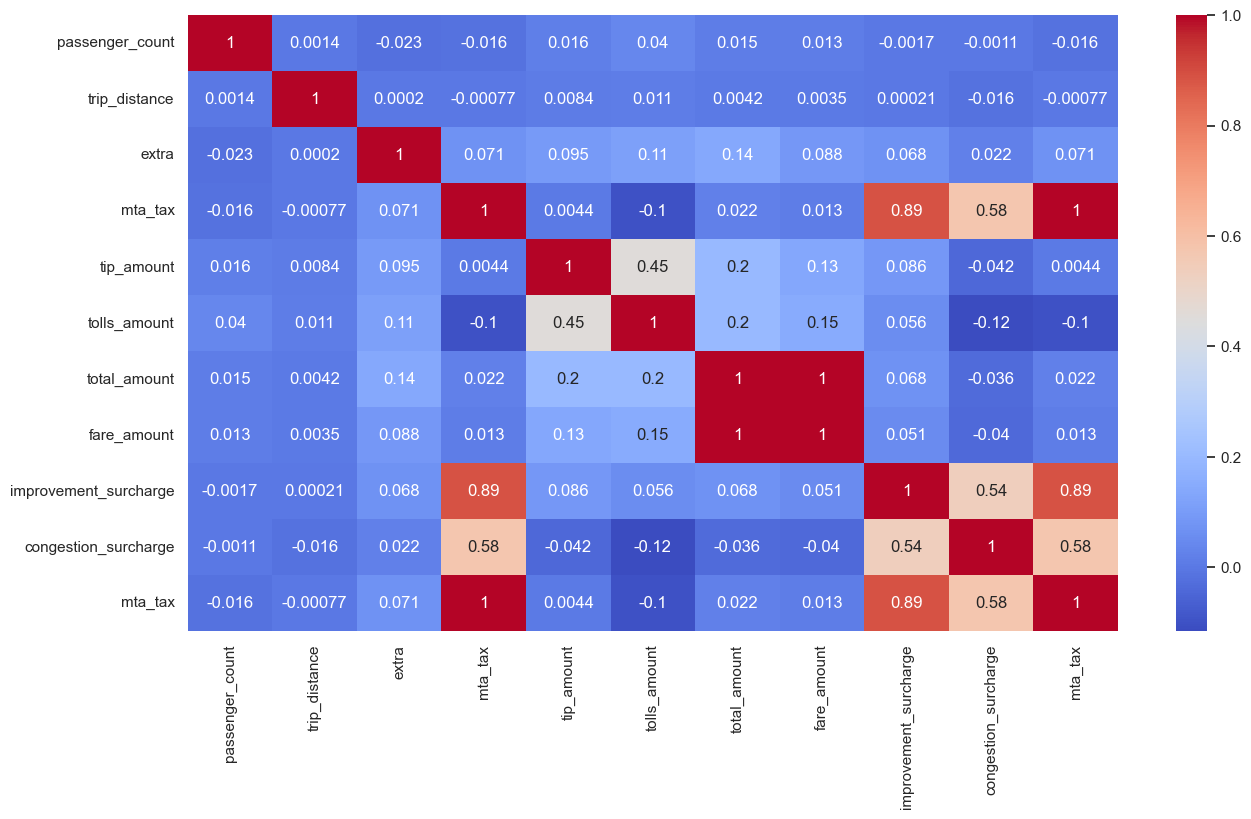

In [22]:
#Grafico la matriz de correlación en un Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, cmap='coolwarm')

<Axes: >

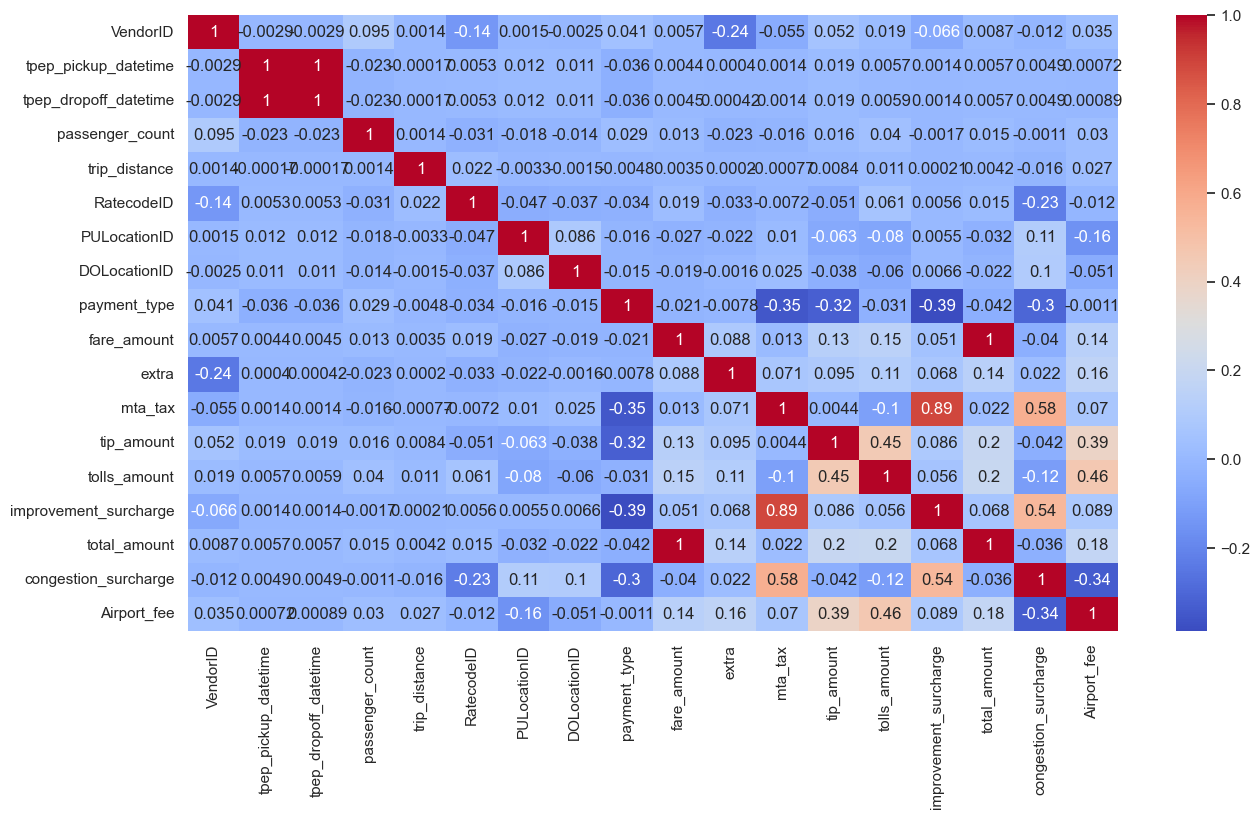

In [23]:
#Grafico la matriz de correlación en un Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(matrizcorr, annot = True, cmap='coolwarm')

Variables Cualitativas: mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [24]:
# cantidad de valores únicos en cada una de las cualitativas
trips[['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 'Airport_fee', 'PULocationID', 'DOLocationID']].nunique()


VendorID                3
RatecodeID              7
store_and_fwd_flag      2
payment_type            5
Airport_fee             6
PULocationID          261
DOLocationID          262
dtype: int64

In [25]:
# frecuencia de cada valor posible en las cualitativas
print(trips['VendorID'].value_counts())
print(trips['RatecodeID'].value_counts())
print(trips['store_and_fwd_flag'].value_counts())
print(trips['payment_type'].value_counts())
print(trips['Airport_fee'].value_counts())
print(trips['PULocationID'].value_counts())
print(trips['DOLocationID'].value_counts())


VendorID
2    6385721
1    2190121
6       2197
Name: count, dtype: int64
RatecodeID
 1.00    7760477
 2.00     346730
 5.00      52827
99.00      52439
 3.00      29860
 4.00      22494
 6.00         15
Name: count, dtype: int64
store_and_fwd_flag
N    8204866
Y      59976
Name: count, dtype: int64
payment_type
1    6572581
2    1515822
0     313197
4     120924
3      55515
Name: count, dtype: int64
Airport_fee
 0.00    7446772
 1.75     803858
-1.75      14207
 1.25          3
 1.70          1
 1.00          1
Name: count, dtype: int64
PULocationID
132    508238
161    394891
237    370296
236    315743
138    308862
        ...  
156         5
172         3
105         3
204         3
99          2
Name: count, Length: 261, dtype: int64
DOLocationID
161    337189
236    332003
237    330287
230    278662
170    259844
        ...  
204        64
2          11
99         10
105         8
110         1
Name: count, Length: 262, dtype: int64


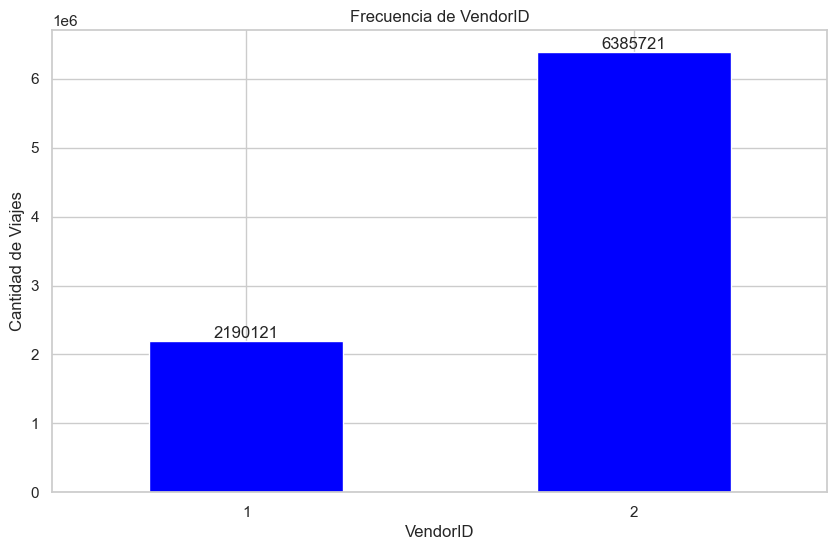

In [26]:
#frecuencias de cada código de tarifa
valores_validos = [1, 2]
trips_filtrados = trips[trips['VendorID'].isin(valores_validos)]
ratecode_counts = trips_filtrados['VendorID'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ratecode_counts.plot(kind='bar', color='blue')

# título y etiquetas
plt.title('Frecuencia de VendorID')
plt.xlabel('VendorID')
plt.ylabel('Cantidad de Viajes')

# etiquetas a las barras
for index, value in enumerate(ratecode_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(ticks=range(len(ratecode_counts.index)), labels=ratecode_counts.index, rotation=0)
plt.show()

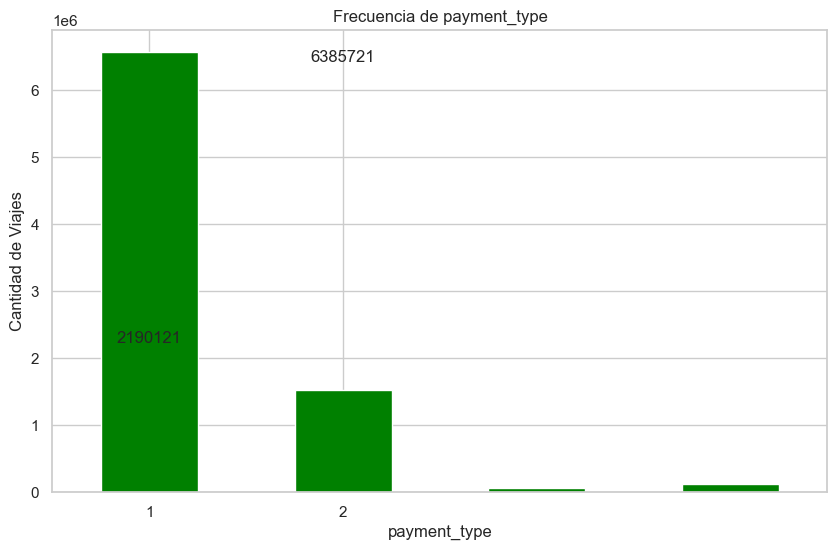

In [27]:
#frecuencias de cada código de tipo de pago
valores_validos = [1, 2, 3, 4, 5, 6]
trips_filtrados = trips[trips['payment_type'].isin(valores_validos)]
metodos_counts = trips_filtrados['payment_type'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
metodos_counts.plot(kind='bar', color='green')

# título y etiquetas
plt.title('Frecuencia de payment_type')
plt.xlabel('payment_type')
plt.ylabel('Cantidad de Viajes')

# etiquetas a las barras
for index, value in enumerate(ratecode_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(ticks=range(len(ratecode_counts.index)), labels=ratecode_counts.index, rotation=0)
plt.show()

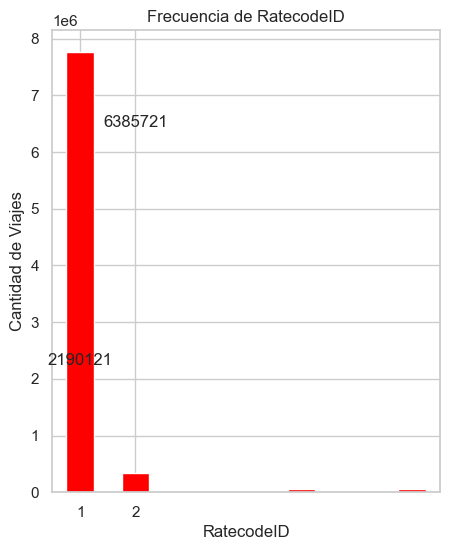

In [28]:
#frecuencias de cada código de tipo de pago
#valores_validos = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
#trips_filtrados = trips[trips['RatecodeID'].isin(valores_validos)]
metodos_counts = trips['RatecodeID'].value_counts().sort_index()

plt.figure(figsize=(5, 6))
metodos_counts.plot(kind='bar', color='red')

# Añadir título y etiquetas
plt.title('Frecuencia de RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Cantidad de Viajes')

# Añadir etiquetas a las barras
for index, value in enumerate(ratecode_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(ticks=range(len(ratecode_counts.index)), labels=ratecode_counts.index, rotation=0)
plt.show()

In [29]:
trips['fare_amount'].value_counts().sort_index()

fare_amount
   -900.00    1
   -870.00    1
   -845.00    1
   -710.00    1
   -700.00    1
             ..
  1,375.00    1
 12,015.47    1
 19,152.90    1
143,163.45    1
187,502.96    1
Name: count, Length: 11404, dtype: int64

Distribucíon del costo medido del viaje para valores entre 0\$ y 250\$

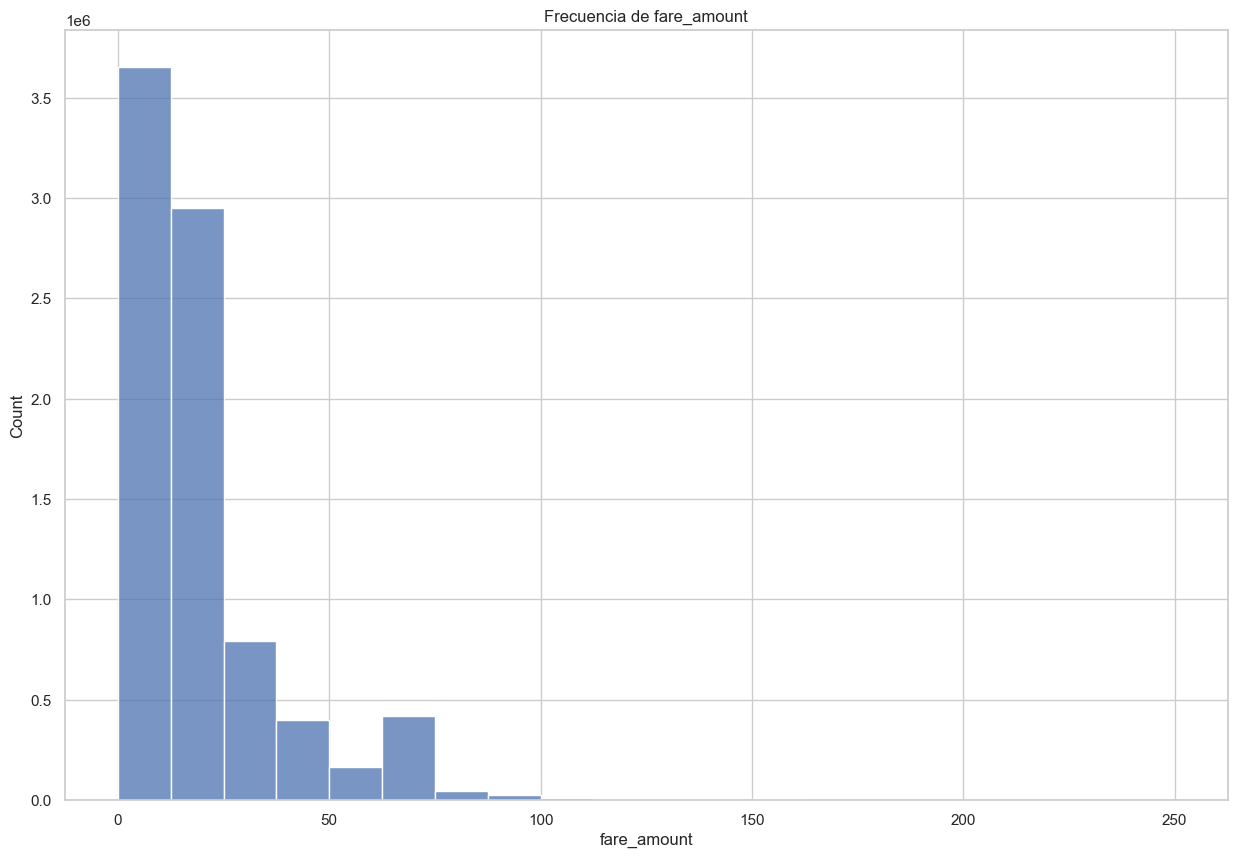

In [30]:
histogramas(trips, 'fare_amount',0,250,20)

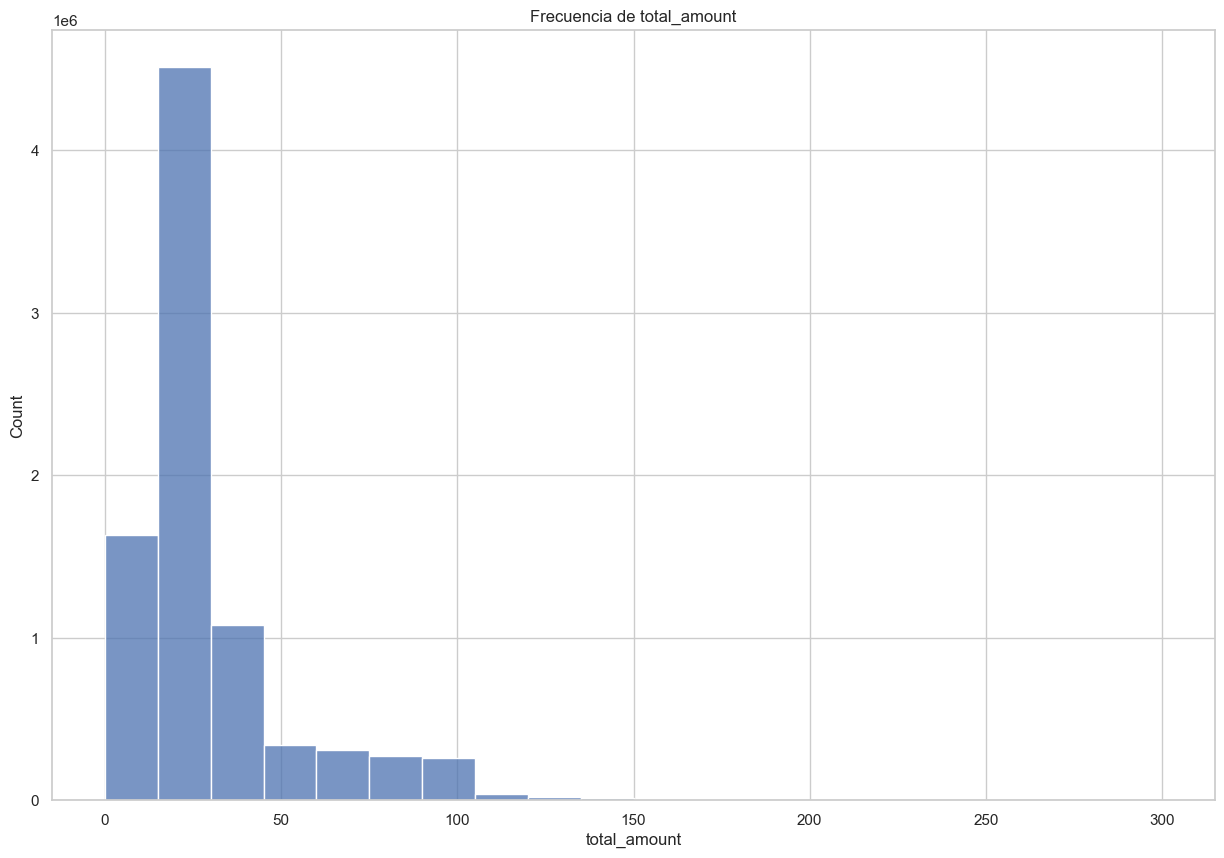

In [31]:
histogramas(trips,'total_amount',0,300,20)

In [32]:
trips['passenger_count'].value_counts()

passenger_count
1.00    6176913
2.00    1264051
3.00     326325
4.00     198221
0.00     124766
5.00     101790
6.00      72666
8.00         66
7.00         24
9.00         20
Name: count, dtype: int64

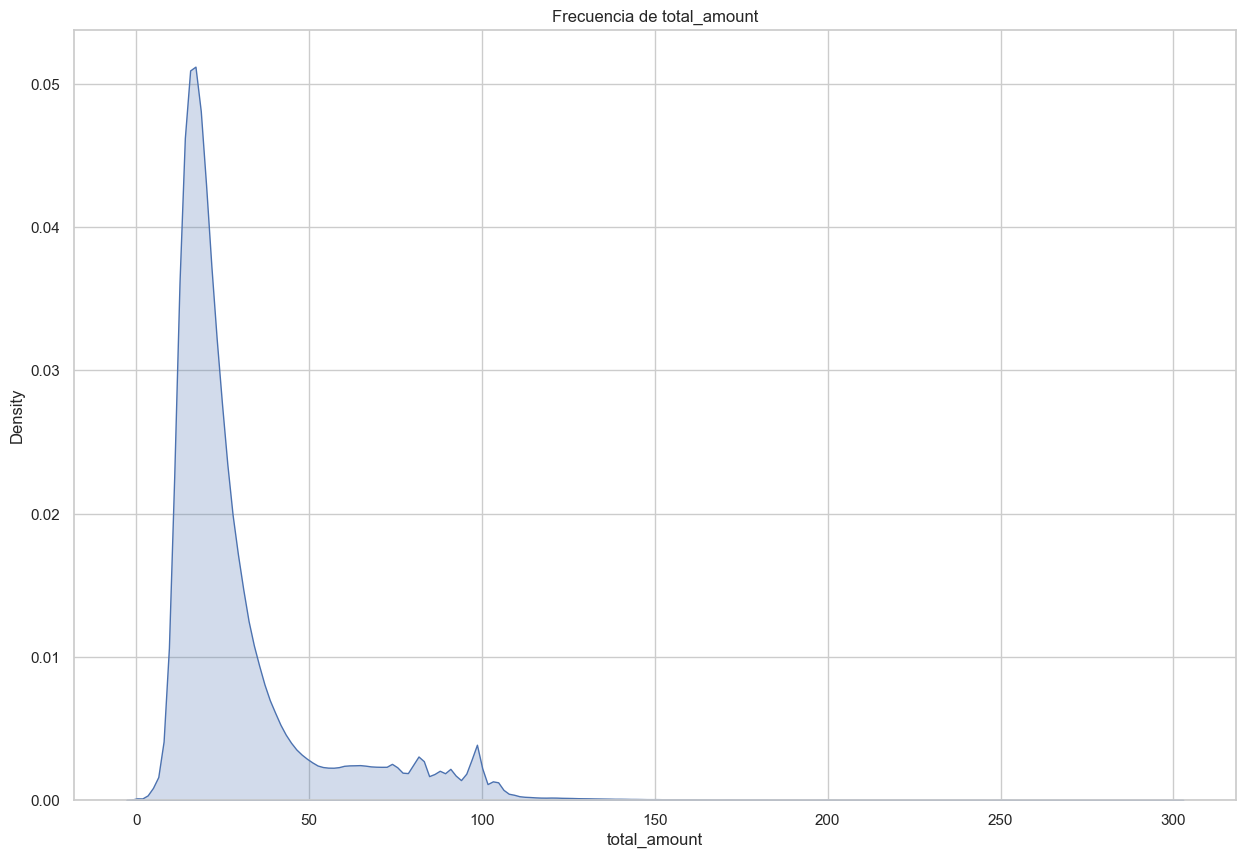

In [33]:
densidad('total_amount',0,300)

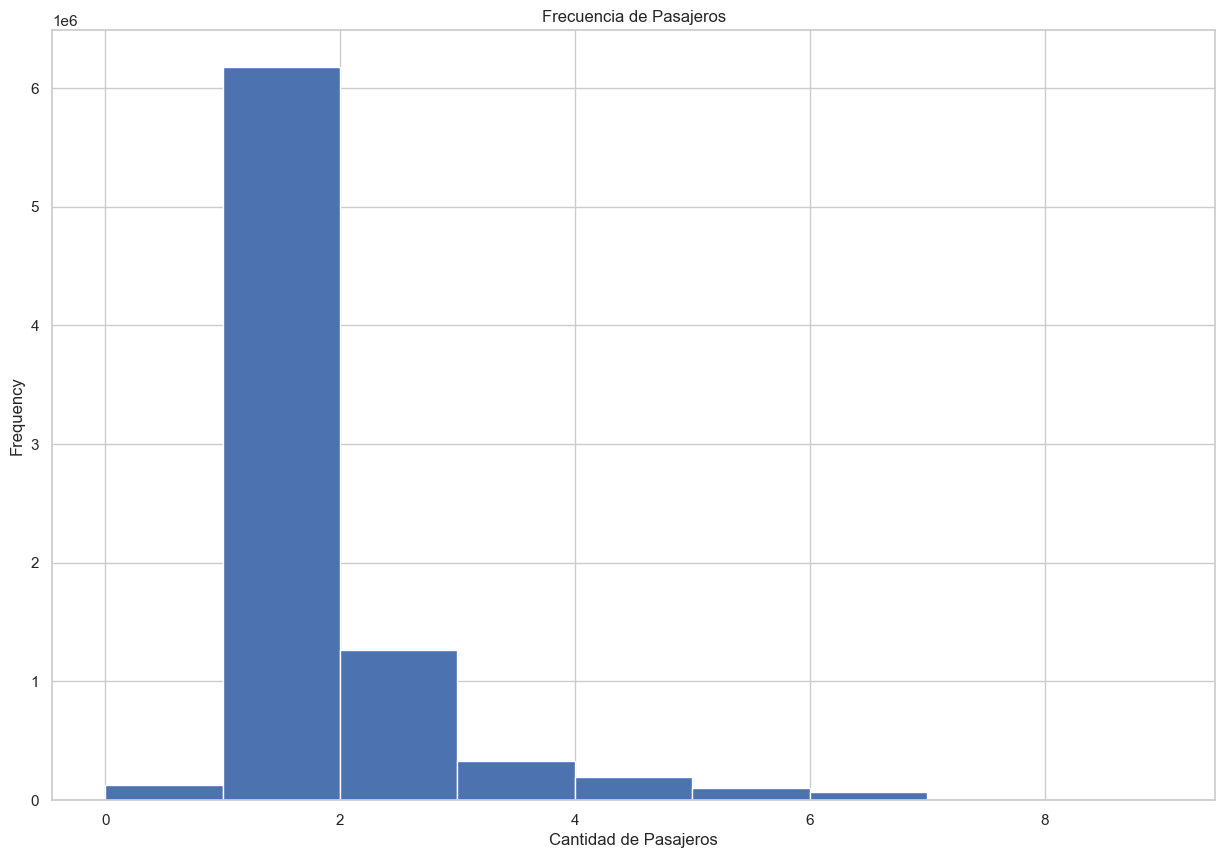

In [34]:
plt.figure(figsize=(15,10))

trips['passenger_count'].plot.hist(bins=9)
  # Añadir título y etiquetas
plt.title('Frecuencia de Pasajeros')
plt.xlabel('Cantidad de Pasajeros')


  # Mostrar el gráfico
plt.show()

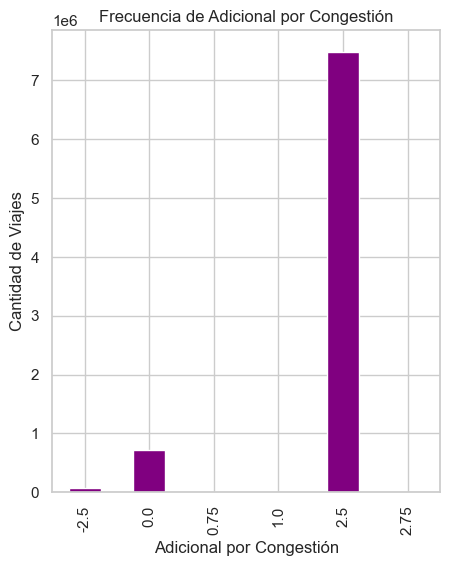

In [35]:
plt.figure(figsize=(5, 6))
trips.value_counts('congestion_surcharge',sort=False).plot.bar(color='purple')

# Añadir título y etiquetas
plt.title('Frecuencia de Adicional por Congestión')
plt.xlabel('Adicional por Congestión')
plt.ylabel('Cantidad de Viajes')


# Mostrar el gráfico
plt.show()

### B-

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
trips_copy = trips.copy()

In [37]:
# Analisis valores Null

# Calcular valores faltantes por columna
missing_values = trips.isnull().sum()
missing_percentage = (missing_values / len(trips)) * 100

# Mostrar el porcentaje de datos faltantes por columna
missing_percentage


VendorID                                0.00
tpep_pickup_datetime                    0.00
tpep_dropoff_datetime                   0.00
passenger_count                         3.65
trip_distance                           0.00
RatecodeID                              3.65
store_and_fwd_flag                      3.65
PULocationID                            0.00
DOLocationID                            0.00
payment_type                            0.00
fare_amount                             0.00
extra                                   0.00
mta_tax                                 0.00
tip_amount                              0.00
tolls_amount                            0.00
improvement_surcharge                   0.00
total_amount                            0.00
congestion_surcharge                    3.65
Airport_fee                             3.65
dtype: float64

Valores iguales a 0
VendorID                                0.00
tpep_pickup_datetime                    0.00
tpep_dropoff_datetime                   0.00
passenger_count                         1.45
trip_distance                           2.40
RatecodeID                              0.00
store_and_fwd_flag                      0.00
PULocationID                            0.00
DOLocationID                            0.00
payment_type                            3.65
fare_amount                             0.03
extra                                  40.83
mta_tax                                 1.07
tip_amount                             25.48
tolls_amount                           91.46
improvement_surcharge                   0.04
total_amount                            0.02
congestion_surcharge                    8.33
Airport_fee                            86.81
dtype: float64 

Valores iguales a 0 donde no deberían
passenger_count                         1.45
trip_distance            

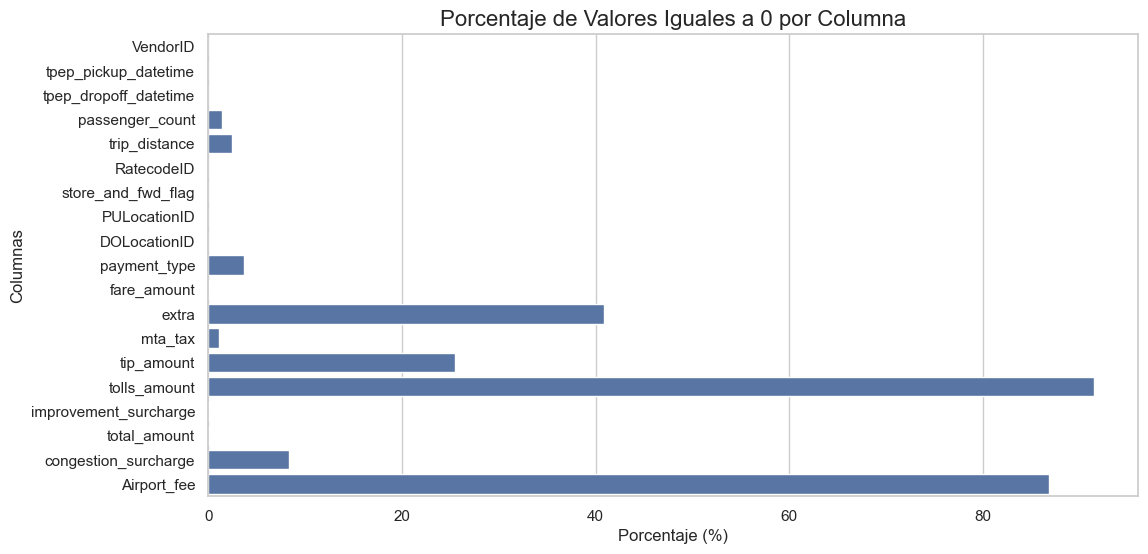

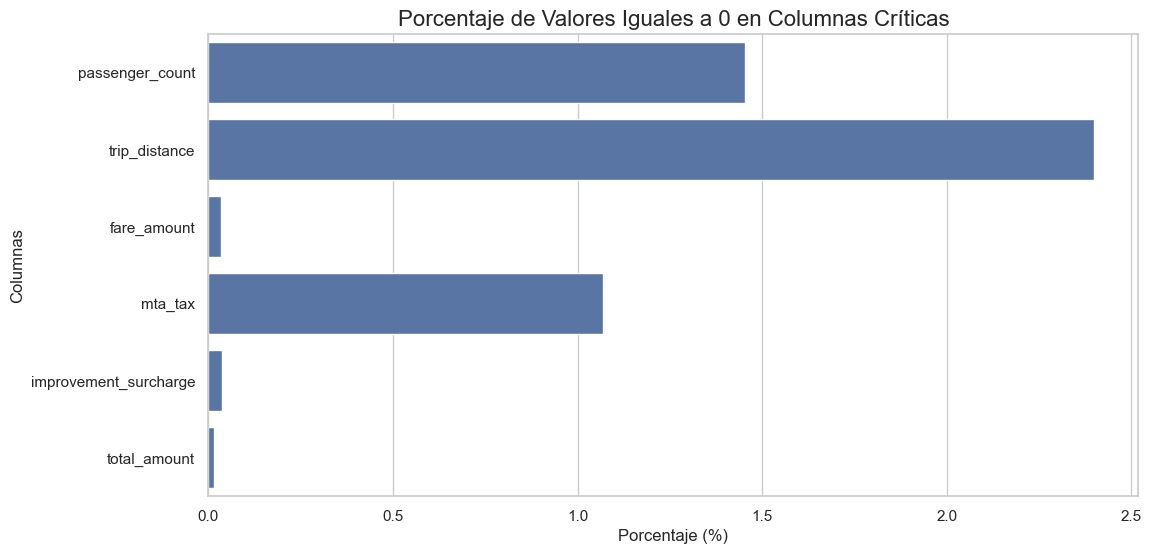

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Valores iguales a 0
print("Valores iguales a 0")
valores_cero = (trips_copy == 0).mean() * 100
print(valores_cero, "\n")

# Valores iguales a 0 donde no deberían
zero_not_allowed = (trips_copy[['passenger_count', 'trip_distance', 'fare_amount', 'mta_tax', 'improvement_surcharge', 'total_amount']] == 0).mean() * 100
print("Valores iguales a 0 donde no deberían")
print(zero_not_allowed)

# Crear DataFrames para los gráficos
df_zero_values = pd.DataFrame({
    'Column': valores_cero.index,
    'Percentage': valores_cero.values
})

df_not_should_be_zero = pd.DataFrame({
    'Column': zero_not_allowed.index,
    'Percentage': zero_not_allowed.values
})

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Gráfico para valores iguales a 0
plt.figure(figsize=(12, 6))
sns.barplot(data=df_zero_values, x='Percentage', y='Column')
plt.title('Porcentaje de Valores Iguales a 0 por Columna', fontsize=16)
plt.xlabel('Porcentaje (%)', fontsize=12)
plt.ylabel('Columnas', fontsize=12)
plt.show()

# Gráfico para valores iguales a 0 donde no deberían
plt.figure(figsize=(12, 6))
sns.barplot(data=df_not_should_be_zero, x='Percentage', y='Column')
plt.title('Porcentaje de Valores Iguales a 0 en Columnas Críticas', fontsize=16)
plt.xlabel('Porcentaje (%)', fontsize=12)
plt.ylabel('Columnas', fontsize=12)
plt.show()

Valores menores a 0
VendorID                                0.00
passenger_count                         0.00
trip_distance                           0.00
RatecodeID                              0.00
PULocationID                            0.00
DOLocationID                            0.00
payment_type                            0.00
fare_amount                             1.07
extra                                   0.53
mta_tax                                 1.03
tip_amount                              0.00
tolls_amount                            0.08
improvement_surcharge                   1.06
total_amount                            1.06
congestion_surcharge                    0.84
Airport_fee                             0.17
dtype: float64


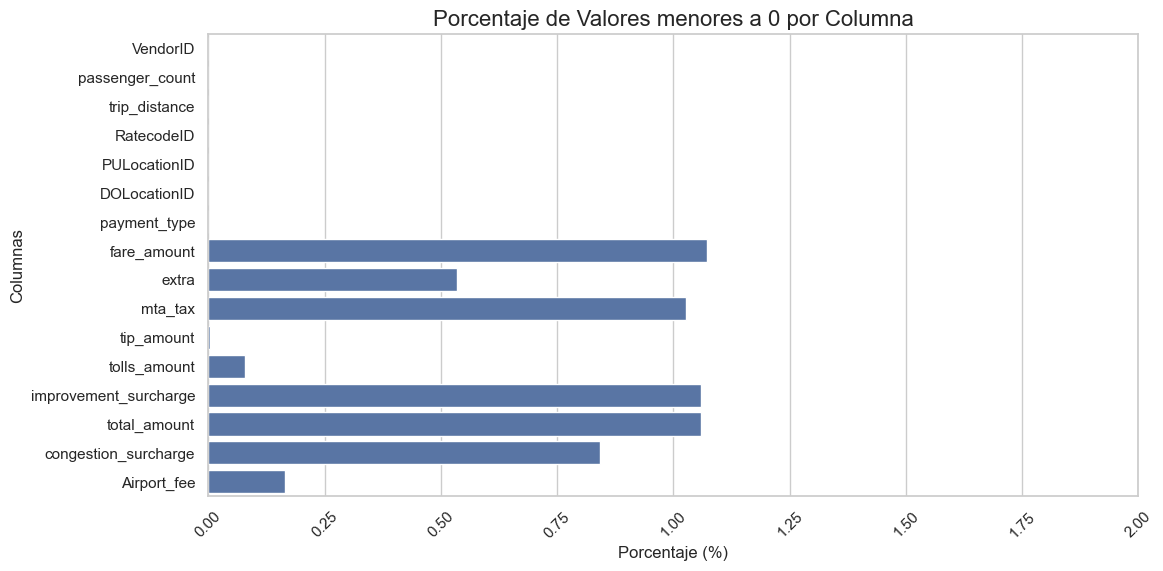

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las columnas numéricas
numerical_cols = trips_copy.select_dtypes(include=['number'])

# Valores menores a 0
print("Valores menores a 0")
valores_menores_a_cero = (numerical_cols < 0).mean() * 100
print(valores_menores_a_cero)

# Crear DataFrame para los gráficos
df_zero_values = pd.DataFrame({
    'Column': valores_menores_a_cero.index,
    'Percentage': valores_menores_a_cero.values
})

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Gráfico para Valores menores a 0
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=df_zero_values, x='Percentage', y='Column')
plt.title('Porcentaje de Valores menores a 0 por Columna', fontsize=16)
plt.xlabel('Porcentaje (%)', fontsize=12)
plt.ylabel('Columnas', fontsize=12)

# Rotar etiquetas del eje y para mejor legibilidad
plt.xticks(rotation=45)
plt.xlim(0, 2)  # Limitar el eje x al 2%

# Mostrar el gráfico
plt.show()

In [40]:
# Verificar cadenas vacías en todas las columnas
empty_strings_count = (trips_copy == '').sum()

# Calcular el porcentaje de cadenas vacías por columna
empty_strings_percentage = (empty_strings_count / len(trips_copy)) * 100

# Crear un DataFrame para mostrar los resultados
df_empty_strings = pd.DataFrame({
    'Column': empty_strings_count.index,
    'Count': empty_strings_count.values,
    'Percentage': empty_strings_percentage.values
})

# Mostrar el DataFrame con las cadenas vacías
print("Cadenas vacías en cada columna:")
print(df_empty_strings)

Cadenas vacías en cada columna:
                   Column  Count           Percentage
0                VendorID      0                 0.00
1    tpep_pickup_datetime      0                 0.00
2   tpep_dropoff_datetime      0                 0.00
3         passenger_count      0                 0.00
4           trip_distance      0                 0.00
5              RatecodeID      0                 0.00
6      store_and_fwd_flag      0                 0.00
7            PULocationID      0                 0.00
8            DOLocationID      0                 0.00
9            payment_type      0                 0.00
10            fare_amount      0                 0.00
11                  extra      0                 0.00
12                mta_tax      0                 0.00
13             tip_amount      0                 0.00
14           tolls_amount      0                 0.00
15  improvement_surcharge      0                 0.00
16           total_amount      0                 0

In [41]:
# Filtrar las columnas 'RatecodeID' y 'payment_type' para obtener los valores fuera de los permitidos (1, 2, 3, 4, 5, 6)
invalid_values = ~trips_copy[['RatecodeID', 'payment_type']].isin([1, 2, 3, 4, 5, 6])

# Excluir los valores Null
invalid_values_no_null = invalid_values & trips_copy[['RatecodeID', 'payment_type']].notnull()

# Identificar los valores no permitidos en la columna 'store_and_fwd_flag' (que no sean 'Y' o 'N')
invalid_store_and_fwd_flag = ~trips_copy[['store_and_fwd_flag']].isin(["Y", "N"])

# Excluir los valores Null para 'store_and_fwd_flag'
invalid_store_and_fwd_flag_no_null = invalid_store_and_fwd_flag & trips_copy[['store_and_fwd_flag']].notnull()

# Calcular el porcentaje de valores no permitidos excluyendo los Null
invalid_percentage = invalid_values_no_null.mean() * 100
print("Porcentaje de valores no permitidos por columna (excluyendo Null):")
print(invalid_percentage)

# Calcular el porcentaje de valores no permitidos en 'store_and_fwd_flag' excluyendo Null
invalid_percentage_store_and_fwd = invalid_store_and_fwd_flag_no_null.mean() * 100
print("Porcentaje de valores no permitidos en 'store_and_fwd_flag' (excluyendo Null):")
print(invalid_percentage_store_and_fwd)


Porcentaje de valores no permitidos por columna (excluyendo Null):
RatecodeID                     0.61
payment_type                   3.65
dtype: float64
Porcentaje de valores no permitidos en 'store_and_fwd_flag' (excluyendo Null):
store_and_fwd_flag                   0.00
dtype: float64


Valores Individuales

In [42]:
import matplotlib.pyplot as plt

def plot_missing_data(variable_name, missing_data_percent):
    """
    Función para graficar el total de datos y los datos faltantes de una variable.

    Args:
    - variable_name (str): Nombre de la variable.
    - missing_data_percent (float): Porcentaje de datos faltantes de la variable.
    """
    total_data = trips_copy[variable_name].shape[0]
    missing_data = (missing_data_percent / 100) * total_data

    data = [total_data, missing_data]
    labels = ['Total de Datos', 'Datos Faltantes']

    colors = ['#4CAF50', '#4CAF50']

    plt.figure(figsize=(8, 5))
    plt.bar(labels, data, color=colors, edgecolor='black', alpha=0.8)

    plt.title(f'Datos Totales vs Datos Faltantes para {variable_name}', fontsize=14, fontweight='bold', color='#333333')
    plt.ylabel('Cantidad', fontsize=12)
    plt.ylim(0, total_data * 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.5)


    plt.text(0, total_data, f'Total: {total_data}', ha='center', va='bottom', fontsize=11, color='#333333', fontweight='bold')
    plt.text(1, missing_data, f'Faltantes: {int(missing_data)} ({missing_data_percent:.2f}%)', ha='center', va='bottom', fontsize=11, color='#333333', fontweight='bold')

    plt.xticks(fontsize=12, color='#333333')
    plt.yticks(fontsize=10, color='#555555')

    plt.tight_layout()
    plt.show()

Columna tpep_pickup_datetime

Porcentaje de valores nulos en 'tpep_pickup_datetime': 0.00%
Porcentaje de cadenas vacías en 'tpep_pickup_datetime': 0.00%
Porcentaje total de datos faltantes en 'tpep_pickup_datetime': 0.00%


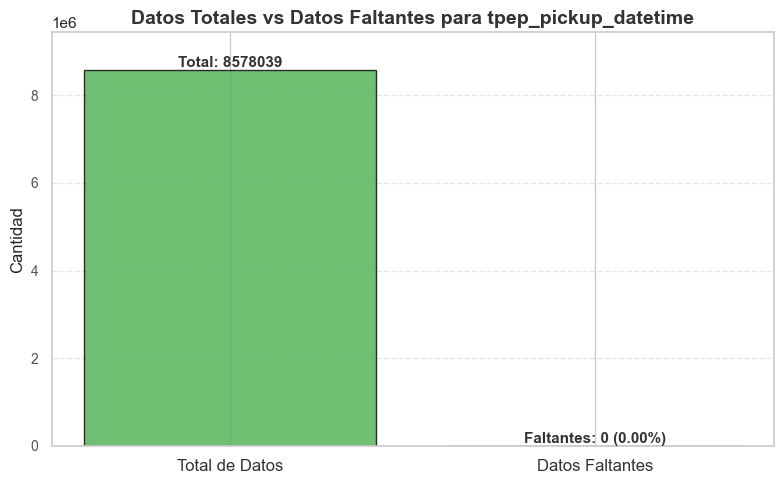

In [43]:
tpep_pickup_datetime_count = trips_copy['tpep_pickup_datetime'].count()

null_percentage = (trips_copy['tpep_pickup_datetime'].isnull().sum() / tpep_pickup_datetime_count) * 100
print(f"Porcentaje de valores nulos en 'tpep_pickup_datetime': {null_percentage:.2f}%")

empty_percentage = (trips_copy['tpep_pickup_datetime'].isin(['', ' ']).sum() / tpep_pickup_datetime_count) * 100
print(f"Porcentaje de cadenas vacías en 'tpep_pickup_datetime': {empty_percentage:.2f}%")

missing_data_percentage = null_percentage + empty_percentage
print(f"Porcentaje total de datos faltantes en 'tpep_pickup_datetime': {missing_data_percentage:.2f}%")

plot_missing_data("tpep_pickup_datetime", missing_data_percentage)

Columa tpep_dropoff_datetime

Porcentaje de valores nulos en 'tpep_dropoff_datetime': 0.00%
Porcentaje de cadenas vacías en 'tpep_dropoff_datetime': 0.00%
Porcentaje total de datos faltantes en 'tpep_dropoff_datetime': 0.00%


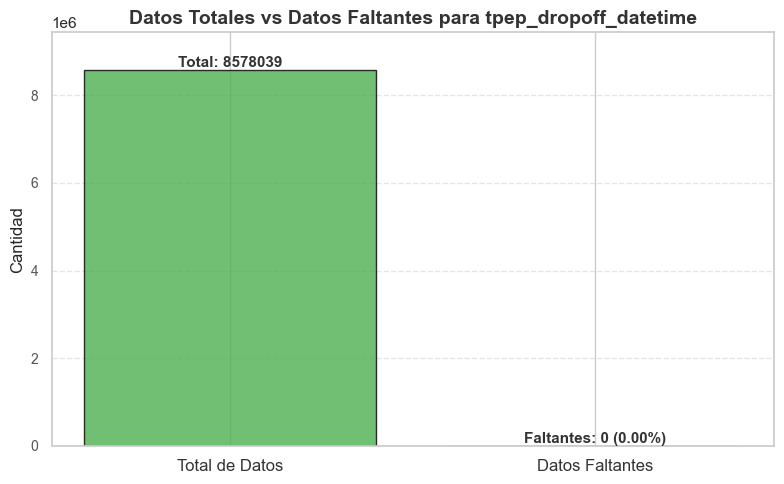

In [44]:
tpep_dropoff_datetime_count = trips_copy['tpep_dropoff_datetime'].count()

null_percentage = (trips_copy['tpep_dropoff_datetime'].isnull().sum() / tpep_dropoff_datetime_count) * 100
print(f"Porcentaje de valores nulos en 'tpep_dropoff_datetime': {null_percentage:.2f}%")

empty_percentage = (trips_copy['tpep_dropoff_datetime'].isin(['', ' ']).sum() / tpep_dropoff_datetime_count) * 100
print(f"Porcentaje de cadenas vacías en 'tpep_dropoff_datetime': {empty_percentage:.2f}%")

missing_data_percentage = null_percentage + empty_percentage
print(f"Porcentaje total de datos faltantes en 'tpep_dropoff_datetime': {missing_data_percentage:.2f}%")

plot_missing_data("tpep_dropoff_datetime", missing_data_percentage)

Columna passenger_count

Porcentaje de valores nulos en 'passenger_count': 3.79%
Porcentaje de valores == 0 en 'passenger_count': 1.51%
Porcentaje de valores < 0 en 'passenger_count': 0.00%
Porcentaje total de datos faltantes en 'passenger_count': 5.30%


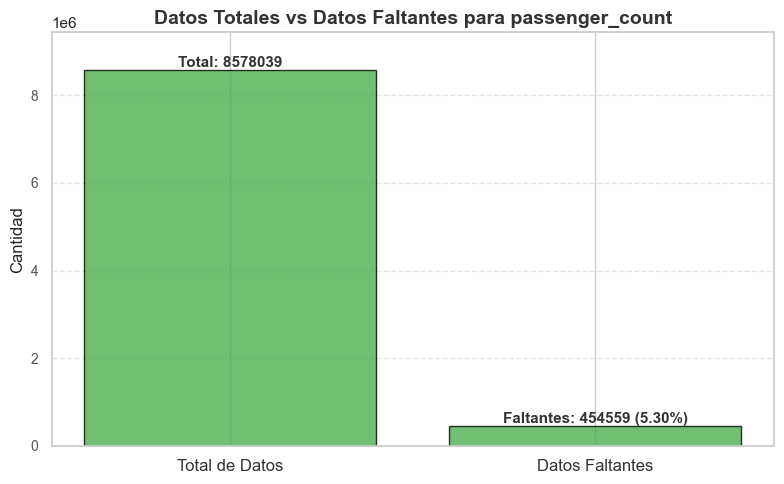

In [45]:
passenger_count_count = trips_copy['passenger_count'].count()

null_percentage = (trips_copy['passenger_count'].isnull().sum() / passenger_count_count) * 100
print(f"Porcentaje de valores nulos en 'passenger_count': {null_percentage:.2f}%")

zero_percentage = ((trips_copy['passenger_count'] == 0).sum()  / passenger_count_count * 100)
print(f"Porcentaje de valores == 0 en 'passenger_count': {zero_percentage:.2f}%")

minus_zero_percentage = ((trips_copy['passenger_count'] < 0).sum()  / passenger_count_count * 100)
print(f"Porcentaje de valores < 0 en 'passenger_count': {minus_zero_percentage:.2f}%")


missing_data_percentage = null_percentage + zero_percentage + minus_zero_percentage
print(f"Porcentaje total de datos faltantes en 'passenger_count': {missing_data_percentage:.2f}%")

plot_missing_data("passenger_count", missing_data_percentage)

Columna trip_distance

Porcentaje de valores nulos en 'trip_distance': 0.00%
Porcentaje de valores == 0 en 'trip_distance': 2.40%
Porcentaje de valores < 0 en 'trip_distance': 0.00%
Porcentaje total de datos faltantes en 'trip_distance': 2.40%


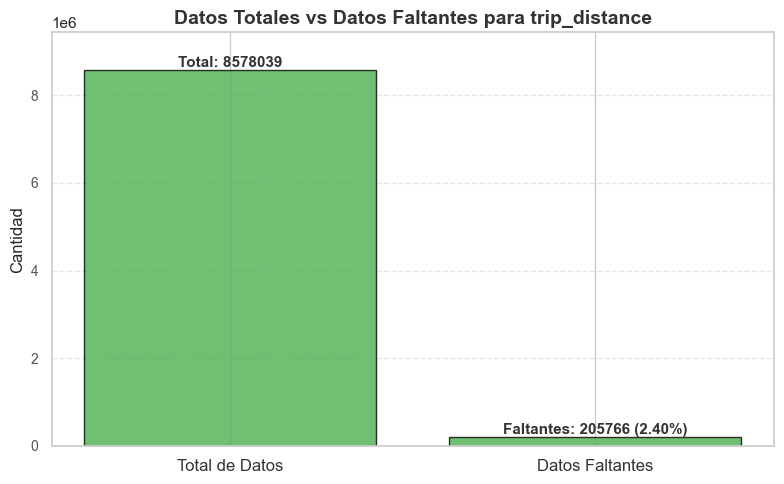

In [46]:
trip_distance_count = trips_copy['trip_distance'].count()

null_percentage = (trips_copy['trip_distance'].isnull().sum() / trip_distance_count) * 100
print(f"Porcentaje de valores nulos en 'trip_distance': {null_percentage:.2f}%")

zero_percentage = ((trips_copy['trip_distance'] == 0).sum()  / trip_distance_count * 100)
print(f"Porcentaje de valores == 0 en 'trip_distance': {zero_percentage:.2f}%")

minus_zero_percentage = ((trips_copy['trip_distance'] < 0).sum()  / trip_distance_count * 100)
print(f"Porcentaje de valores < 0 en 'trip_distance': {minus_zero_percentage:.2f}%")


missing_data_percentage = null_percentage + zero_percentage + minus_zero_percentage
print(f"Porcentaje total de datos faltantes en 'trip_distance': {missing_data_percentage:.2f}%")

plot_missing_data("trip_distance", missing_data_percentage)

Columna RatecodeID

Porcentaje de valores nulos en 'RatecodeID': 3.79%
Porcentaje de no null y no en [1,2,3,4,5,6] 'RatecodeID': 0.63%
Porcentaje total de datos faltantes en 'RatecodeID': 4.42%


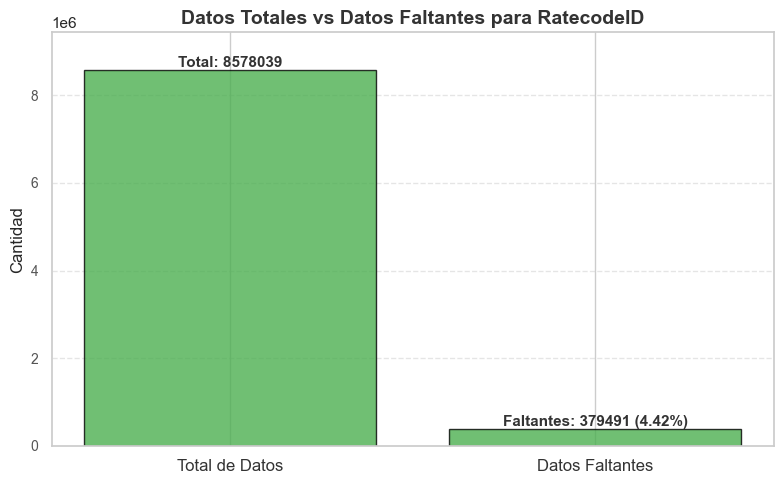

In [47]:
RatecodeID_count = trips_copy['RatecodeID'].count()

null_percentage = (trips_copy['RatecodeID'].isnull().sum() / RatecodeID_count) * 100
print(f"Porcentaje de valores nulos en 'RatecodeID': {null_percentage:.2f}%")

notnull_and_not_values = (trips_copy['RatecodeID'].notnull() & ~trips_copy['RatecodeID'].isin([1, 2, 3, 4, 5, 6])).sum() / RatecodeID_count * 100
print(f"Porcentaje de no null y no en [1,2,3,4,5,6] 'RatecodeID': {notnull_and_not_values:.2f}%")

missing_data_percentage = null_percentage + notnull_and_not_values
print(f"Porcentaje total de datos faltantes en 'RatecodeID': {missing_data_percentage:.2f}%")

plot_missing_data("RatecodeID", missing_data_percentage)

Columna store_and_fwd_flag

Porcentaje de valores nulos en 'store_and_fwd_flag': 3.79%
0.0
Porcentaje de no null y no en [Y,N] 'store_and_fwd_flag': 0.00%
Porcentaje total de datos faltantes en 'store_and_fwd_flag': 3.79%


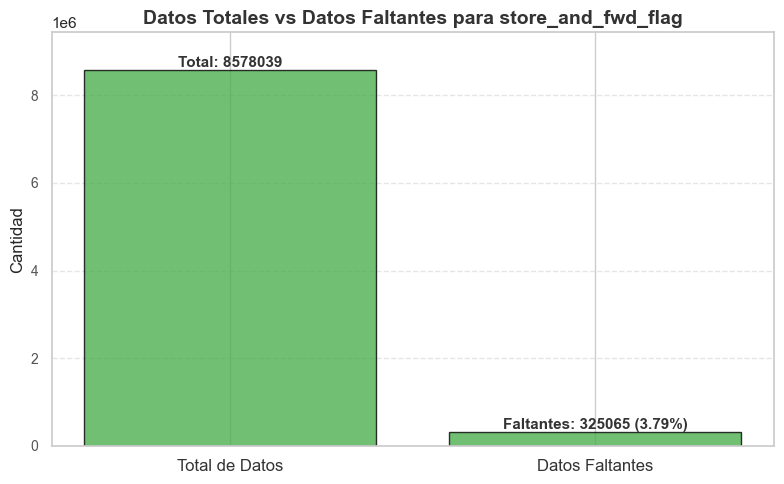

In [48]:
store_and_fwd_flag_count = trips_copy['store_and_fwd_flag'].count()

null_percentage = (trips_copy['store_and_fwd_flag'].isnull().sum() / store_and_fwd_flag_count) * 100
print(f"Porcentaje de valores nulos en 'store_and_fwd_flag': {null_percentage:.2f}%")

notnull_and_not_values = (trips_copy['store_and_fwd_flag'].notnull() & ~trips_copy['store_and_fwd_flag'].isin(["Y","N"])).sum() / store_and_fwd_flag_count * 100
print(notnull_and_not_values)
print(f"Porcentaje de no null y no en [Y,N] 'store_and_fwd_flag': {notnull_and_not_values:.2f}%")

missing_data_percentage = null_percentage + notnull_and_not_values
print(f"Porcentaje total de datos faltantes en 'store_and_fwd_flag': {missing_data_percentage:.2f}%")

plot_missing_data("store_and_fwd_flag", missing_data_percentage)

Columna PULocationID

Porcentaje de valores nulos en 'PULocationID': 0.00%
Porcentaje de valores == 0 en 'PULocationID': 0.00%
Porcentaje de valores < 0 en 'PULocationID': 0.00%
Porcentaje total de datos faltantes en 'PULocationID': 0.00%


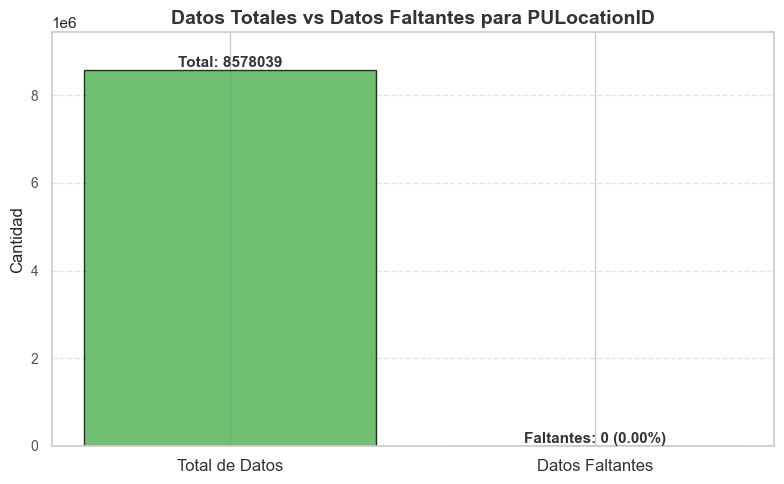

In [49]:
PULocationID_count = trips_copy['PULocationID'].count()

null_percentage = (trips_copy['PULocationID'].isnull().sum() / PULocationID_count) * 100
print(f"Porcentaje de valores nulos en 'PULocationID': {null_percentage:.2f}%")

zero_percentage = ((trips_copy['PULocationID'] == 0).sum()  / PULocationID_count * 100)
print(f"Porcentaje de valores == 0 en 'PULocationID': {zero_percentage:.2f}%")

minus_zero_percentage = ((trips_copy['PULocationID'] < 0).sum()  / PULocationID_count * 100)
print(f"Porcentaje de valores < 0 en 'PULocationID': {minus_zero_percentage:.2f}%")


missing_data_percentage = null_percentage + zero_percentage + minus_zero_percentage
print(f"Porcentaje total de datos faltantes en 'PULocationID': {missing_data_percentage:.2f}%")

plot_missing_data("PULocationID", missing_data_percentage)

Columna DOLocationID

Porcentaje de valores nulos en 'DOLocationID': 0.00%
Porcentaje de valores == 0 en 'DOLocationID': 0.00%
Porcentaje de valores < 0 en 'DOLocationID': 0.00%
Porcentaje total de datos faltantes en 'DOLocationID': 0.00%


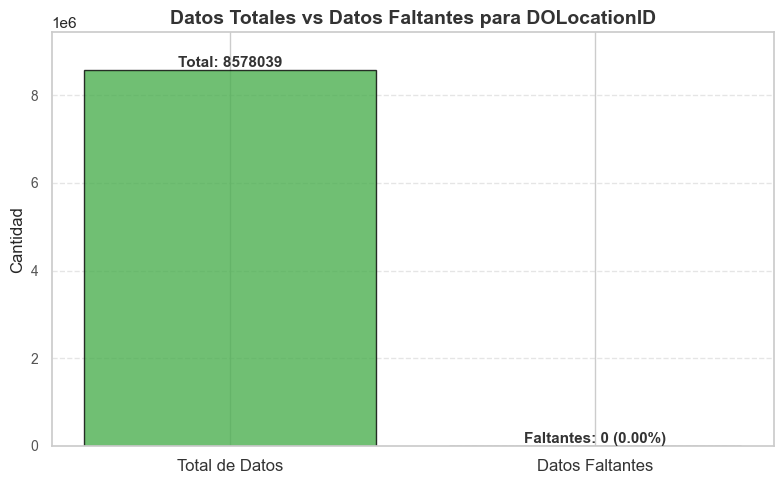

In [50]:
DOLocationID_count = trips_copy['DOLocationID'].count()

null_percentage = (trips_copy['DOLocationID'].isnull().sum() / DOLocationID_count) * 100
print(f"Porcentaje de valores nulos en 'DOLocationID': {null_percentage:.2f}%")

zero_percentage = ((trips_copy['DOLocationID'] == 0).sum()  / DOLocationID_count * 100)
print(f"Porcentaje de valores == 0 en 'DOLocationID': {zero_percentage:.2f}%")

minus_zero_percentage = ((trips_copy['DOLocationID'] < 0).sum()  / DOLocationID_count * 100)
print(f"Porcentaje de valores < 0 en 'DOLocationID': {minus_zero_percentage:.2f}%")


missing_data_percentage = null_percentage + zero_percentage + minus_zero_percentage
print(f"Porcentaje total de datos faltantes en 'DOLocationID': {missing_data_percentage:.2f}%")

plot_missing_data("DOLocationID", missing_data_percentage)

Columna payment_type

Porcentaje de valores nulos en 'payment_type': 0.00%
Porcentaje de no null y no en [1,2,3,4,5,6] 'payment_type': 3.65%
Porcentaje total de datos faltantes en 'payment_type': 3.65%


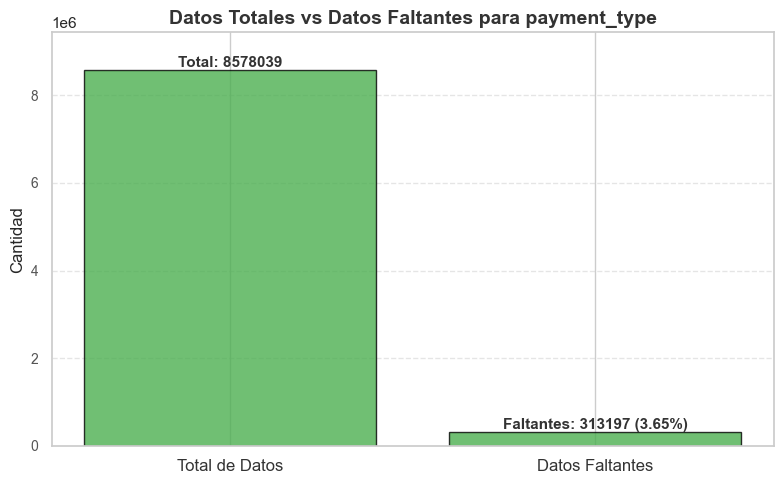

In [51]:
payment_type_count = trips_copy['payment_type'].count()

null_percentage = (trips_copy['payment_type'].isnull().sum() / payment_type_count) * 100
print(f"Porcentaje de valores nulos en 'payment_type': {null_percentage:.2f}%")

notnull_and_not_values = (trips_copy['payment_type'].notnull() & ~trips_copy['payment_type'].isin([1, 2, 3, 4, 5, 6])).sum() / payment_type_count * 100
print(f"Porcentaje de no null y no en [1,2,3,4,5,6] 'payment_type': {notnull_and_not_values:.2f}%")

missing_data_percentage = null_percentage + notnull_and_not_values
print(f"Porcentaje total de datos faltantes en 'payment_type': {missing_data_percentage:.2f}%")

plot_missing_data("payment_type", missing_data_percentage)

Columna fare_amount

Porcentaje de valores nulos en 'fare_amount': 0.00%
Porcentaje de valores == 0 en 'fare_amount': 0.03%
Porcentaje de valores < 0 en 'fare_amount': 1.07%
Porcentaje total de datos faltantes en 'fare_amount': 1.11%


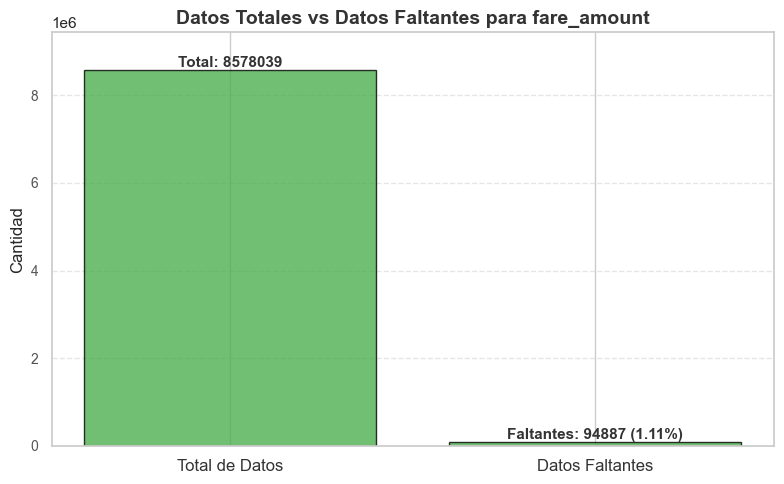

In [52]:
fare_amount_count = trips_copy['fare_amount'].count()

null_percentage = (trips_copy['fare_amount'].isnull().sum() / fare_amount_count) * 100
print(f"Porcentaje de valores nulos en 'fare_amount': {null_percentage:.2f}%")

zero_percentage = ((trips_copy['fare_amount'] == 0).sum()  / fare_amount_count * 100)
print(f"Porcentaje de valores == 0 en 'fare_amount': {zero_percentage:.2f}%")

minus_zero_percentage = ((trips_copy['fare_amount'] < 0).sum()  / fare_amount_count * 100)
print(f"Porcentaje de valores < 0 en 'fare_amount': {minus_zero_percentage:.2f}%")


missing_data_percentage = null_percentage + zero_percentage + minus_zero_percentage
print(f"Porcentaje total de datos faltantes en 'fare_amount': {missing_data_percentage:.2f}%")

plot_missing_data("fare_amount", missing_data_percentage)

Columna extra

Porcentaje de valores nulos en 'extra': 0.00%
Porcentaje de valores < 0 en 'extra': 0.53%
Porcentaje total de datos faltantes en 'extra': 0.53%


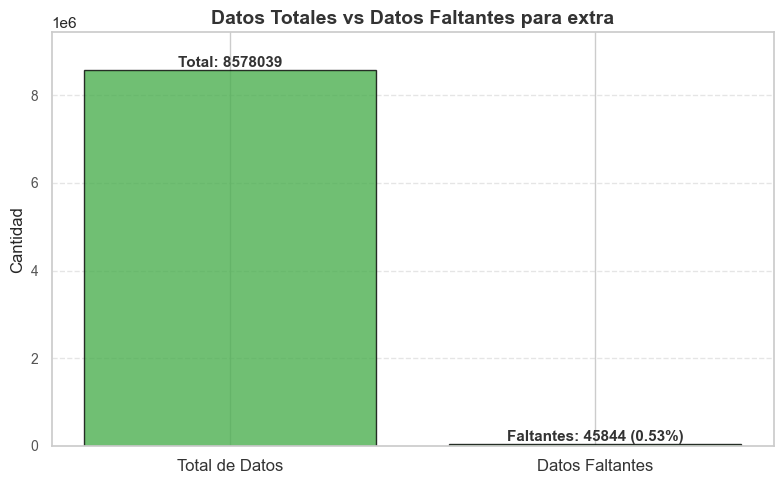

In [53]:
extra_count = trips_copy['extra'].count()

null_percentage = (trips_copy['extra'].isnull().sum() / extra_count) * 100
print(f"Porcentaje de valores nulos en 'extra': {null_percentage:.2f}%")

minus_zero_percentage = ((trips_copy['extra'] < 0).sum()  / extra_count * 100)
print(f"Porcentaje de valores < 0 en 'extra': {minus_zero_percentage:.2f}%")

missing_data_percentage = null_percentage + minus_zero_percentage
print(f"Porcentaje total de datos faltantes en 'extra': {missing_data_percentage:.2f}%")

plot_missing_data("extra", missing_data_percentage)

Columna mta_tax

Porcentaje de valores nulos en 'mta_tax': 0.00%
Porcentaje de valores == 0 en 'mta_tax': 1.07%
Porcentaje de valores < 0 en 'mta_tax': 1.03%
Porcentaje total de datos faltantes en 'mta_tax': 2.10%


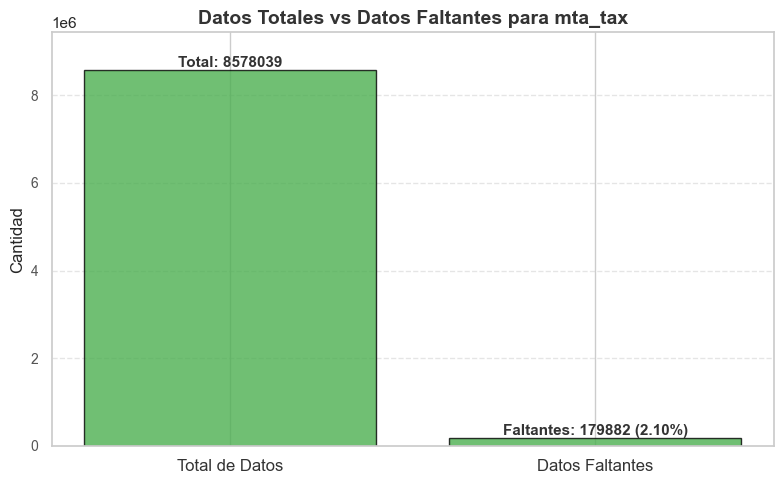

In [54]:
mta_tax_count = trips_copy['mta_tax'].count()

null_percentage = (trips_copy['mta_tax'].isnull().sum() / mta_tax_count) * 100
print(f"Porcentaje de valores nulos en 'mta_tax': {null_percentage:.2f}%")

zero_percentage = ((trips_copy['mta_tax'] == 0).sum()  / mta_tax_count * 100)
print(f"Porcentaje de valores == 0 en 'mta_tax': {zero_percentage:.2f}%")

minus_zero_percentage = ((trips_copy['mta_tax'] < 0).sum()  / mta_tax_count * 100)
print(f"Porcentaje de valores < 0 en 'mta_tax': {minus_zero_percentage:.2f}%")


missing_data_percentage = null_percentage + zero_percentage + minus_zero_percentage
print(f"Porcentaje total de datos faltantes en 'mta_tax': {missing_data_percentage:.2f}%")

plot_missing_data("mta_tax", missing_data_percentage)

Columna tip_amount

Porcentaje de valores nulos en 'tip_amount': 0.00%
Porcentaje de valores < 0 en 'tip_amount': 0.00%
Porcentaje total de datos faltantes en 'tip_amount': 0.00%


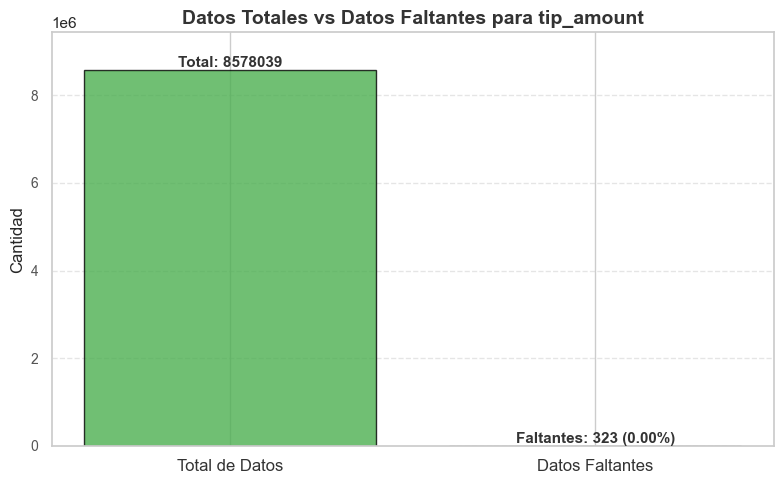

In [55]:
tip_amount_count = trips_copy['tip_amount'].count()

null_percentage = (trips_copy['tip_amount'].isnull().sum() / tip_amount_count) * 100
print(f"Porcentaje de valores nulos en 'tip_amount': {null_percentage:.2f}%")

minus_zero_percentage = ((trips_copy['tip_amount'] < 0).sum()  / tip_amount_count * 100)
print(f"Porcentaje de valores < 0 en 'tip_amount': {minus_zero_percentage:.2f}%")

missing_data_percentage = null_percentage + minus_zero_percentage
print(f"Porcentaje total de datos faltantes en 'tip_amount': {missing_data_percentage:.2f}%")

plot_missing_data("tip_amount", missing_data_percentage)

Columna tolls_amount

Porcentaje de valores nulos en 'tolls_amount': 0.00%
Porcentaje de valores < 0 en 'tolls_amount': 0.08%
Porcentaje total de datos faltantes en 'tolls_amount': 0.08%


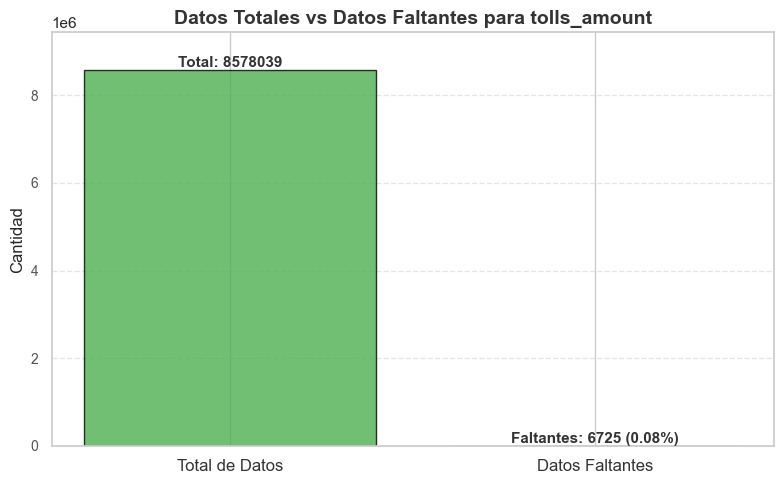

In [56]:
tolls_amount_count = trips_copy['tolls_amount'].count()

null_percentage = (trips_copy['tolls_amount'].isnull().sum() / tolls_amount_count) * 100
print(f"Porcentaje de valores nulos en 'tolls_amount': {null_percentage:.2f}%")

minus_zero_percentage = ((trips_copy['tolls_amount'] < 0).sum()  / tolls_amount_count * 100)
print(f"Porcentaje de valores < 0 en 'tolls_amount': {minus_zero_percentage:.2f}%")

missing_data_percentage = null_percentage + minus_zero_percentage
print(f"Porcentaje total de datos faltantes en 'tolls_amount': {missing_data_percentage:.2f}%")

plot_missing_data("tolls_amount", missing_data_percentage)

Columna improvement_surcharge

Porcentaje de valores nulos en 'improvement_surcharge': 0.00%
Porcentaje de valores != de 0.3 en 'improvement_surcharge': 99.96%
Porcentaje total de datos faltantes en 'improvement_surcharge': 99.96%


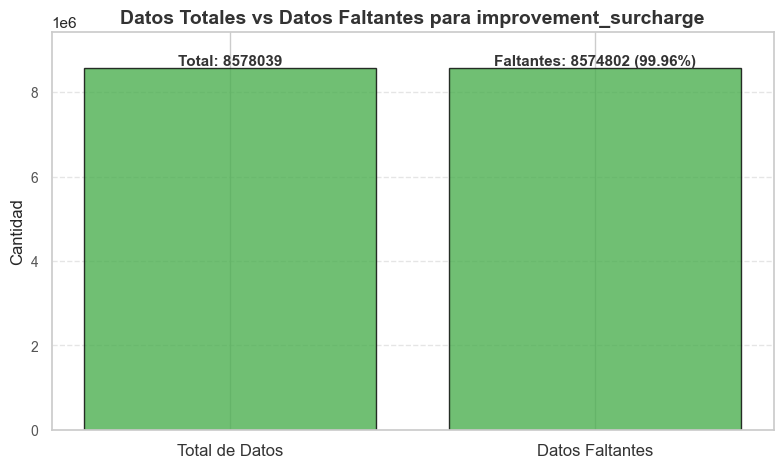

In [57]:
improvement_surcharge_count = trips_copy['improvement_surcharge'].count()

null_percentage = (trips_copy['improvement_surcharge'].isnull().sum() / improvement_surcharge_count) * 100
print(f"Porcentaje de valores nulos en 'improvement_surcharge': {null_percentage:.2f}%")

diff_03 = (trips_copy['improvement_surcharge'] != 0.30).sum()  / improvement_surcharge_count * 100
print(f"Porcentaje de valores != de 0.3 en 'improvement_surcharge': {diff_03:.2f}%")

missing_data_percentage = null_percentage + diff_03
print(f"Porcentaje total de datos faltantes en 'improvement_surcharge': {missing_data_percentage:.2f}%")

plot_missing_data("improvement_surcharge", missing_data_percentage)

Columna total_amount

Porcentaje de valores nulos en 'total_amount': 0.00%
Porcentaje de valores == 0 en 'total_amount': 0.02%
Porcentaje de valores < 0 en 'total_amount': 1.06%
Porcentaje total de datos faltantes en 'total_amount': 1.08%


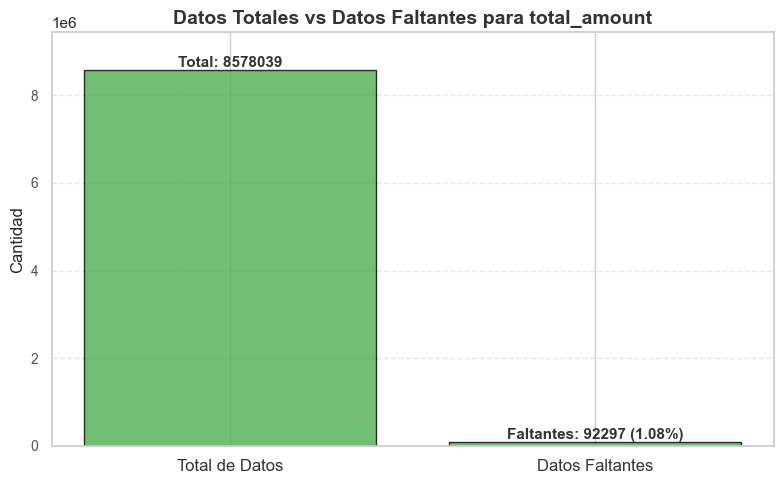

In [58]:
total_amount_count = trips_copy['total_amount'].count()

null_percentage = (trips_copy['total_amount'].isnull().sum() / total_amount_count) * 100
print(f"Porcentaje de valores nulos en 'total_amount': {null_percentage:.2f}%")

zero_percentage = ((trips_copy['total_amount'] == 0).sum()  / total_amount_count * 100)
print(f"Porcentaje de valores == 0 en 'total_amount': {zero_percentage:.2f}%")

minus_zero_percentage = ((trips_copy['total_amount'] < 0).sum()  / total_amount_count * 100)
print(f"Porcentaje de valores < 0 en 'total_amount': {minus_zero_percentage:.2f}%")


missing_data_percentage = null_percentage + zero_percentage + minus_zero_percentage
print(f"Porcentaje total de datos faltantes en 'total_amount': {missing_data_percentage:.2f}%")

plot_missing_data("total_amount", missing_data_percentage)

Columna congestion_surcharge

Porcentaje de valores nulos en 'congestion_surcharge': 3.79%
Porcentaje de valores < 0 en 'congestion_surcharge': 0.87%
Porcentaje total de datos faltantes en 'congestion_surcharge': 4.66%


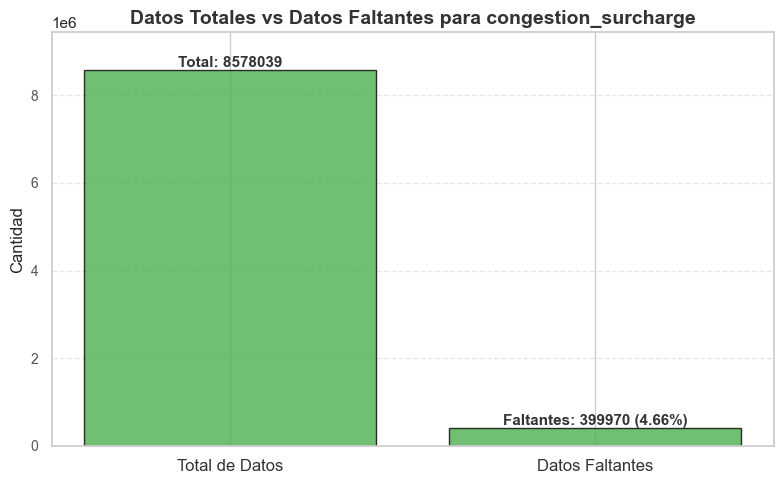

In [59]:
congestion_surcharge_count = trips_copy['congestion_surcharge'].count()

null_percentage = (trips_copy['congestion_surcharge'].isnull().sum() / congestion_surcharge_count) * 100
print(f"Porcentaje de valores nulos en 'congestion_surcharge': {null_percentage:.2f}%")

minus_zero_percentage = ((trips_copy['congestion_surcharge'] < 0).sum()  / congestion_surcharge_count * 100)
print(f"Porcentaje de valores < 0 en 'congestion_surcharge': {minus_zero_percentage:.2f}%")

missing_data_percentage = null_percentage + minus_zero_percentage
print(f"Porcentaje total de datos faltantes en 'congestion_surcharge': {missing_data_percentage:.2f}%")

plot_missing_data("congestion_surcharge", missing_data_percentage)

Columna Airport_fee

Porcentaje de valores nulos en 'Airport_fee': 3.79%
Porcentaje de valores < 0 en 'Airport_fee': 0.17%
Porcentaje total de datos faltantes en 'Airport_fee': 3.96%


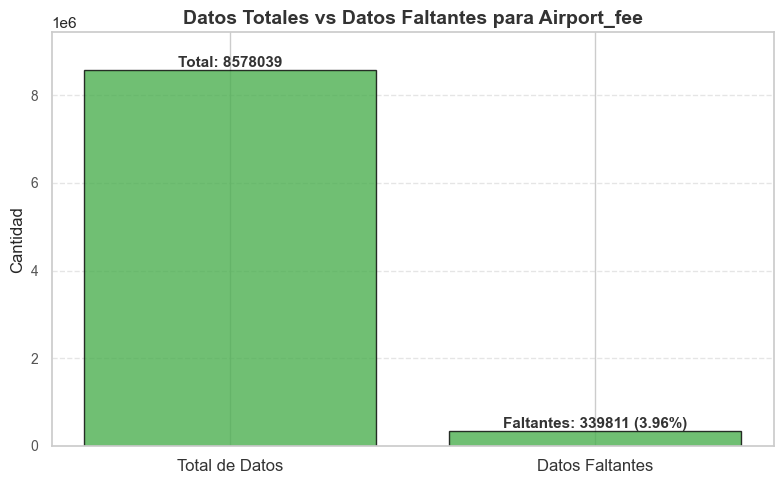

In [60]:
Airport_fee_count = trips_copy['Airport_fee'].count()

null_percentage = (trips_copy['Airport_fee'].isnull().sum() / Airport_fee_count) * 100
print(f"Porcentaje de valores nulos en 'Airport_fee': {null_percentage:.2f}%")

minus_zero_percentage = ((trips_copy['Airport_fee'] < 0).sum()  / Airport_fee_count * 100)
print(f"Porcentaje de valores < 0 en 'Airport_fee': {minus_zero_percentage:.2f}%")

missing_data_percentage = null_percentage + minus_zero_percentage
print(f"Porcentaje total de datos faltantes en 'Airport_fee': {missing_data_percentage:.2f}%")

plot_missing_data("Airport_fee", missing_data_percentage)

Luego del analisis pasaremos a tomar decisiones

Valores nulos

In [61]:
# Verificar las columnas específicas para valores nulos
cols_to_check = ['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'Airport_fee']
null_counts = trips_copy[cols_to_check].isnull().sum() / len(trips_copy) * 100
print("Valores nulos por columna en las columnas seleccionadas:")
print(null_counts)

# Filtrar filas con exactamente 5 valores nulos en las columnas seleccionadas
rows_with_5_nulls_specific_cols = trips_copy[cols_to_check].isnull().sum(axis=1) == 5

# Porcentaje frente al total de filas
percentage_rows_with_5_nulls = (rows_with_5_nulls_specific_cols.sum() / len(trips_copy)) * 100
print(f"Porcentaje de filas con exactamente 5 valores nulos en las columnas seleccionadas: {percentage_rows_with_5_nulls:.2f}%")

# En el caso de los nulls Después de revisar las filas con valores nulos, encontramos que aquellas que presentan valores nulos en las cinco columnas:
# passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge y Airport_fee,
# tienen un porcentaje de nulls de 3.65%. Este hallazgo tiene sentido, ya que todas estas columnas comparten el mismo porcentaje de valores nulos.

# Procedemos a eliminarlas del set
# Eliminar filas con exactamente 5 valores nulos

trips_copy = trips_copy[~rows_with_5_nulls_specific_cols]

Valores nulos por columna en las columnas seleccionadas:
passenger_count                        3.65
RatecodeID                             3.65
store_and_fwd_flag                     3.65
congestion_surcharge                   3.65
Airport_fee                            3.65
dtype: float64
Porcentaje de filas con exactamente 5 valores nulos en las columnas seleccionadas: 3.65%


Valores iguales a 0 que no deberian

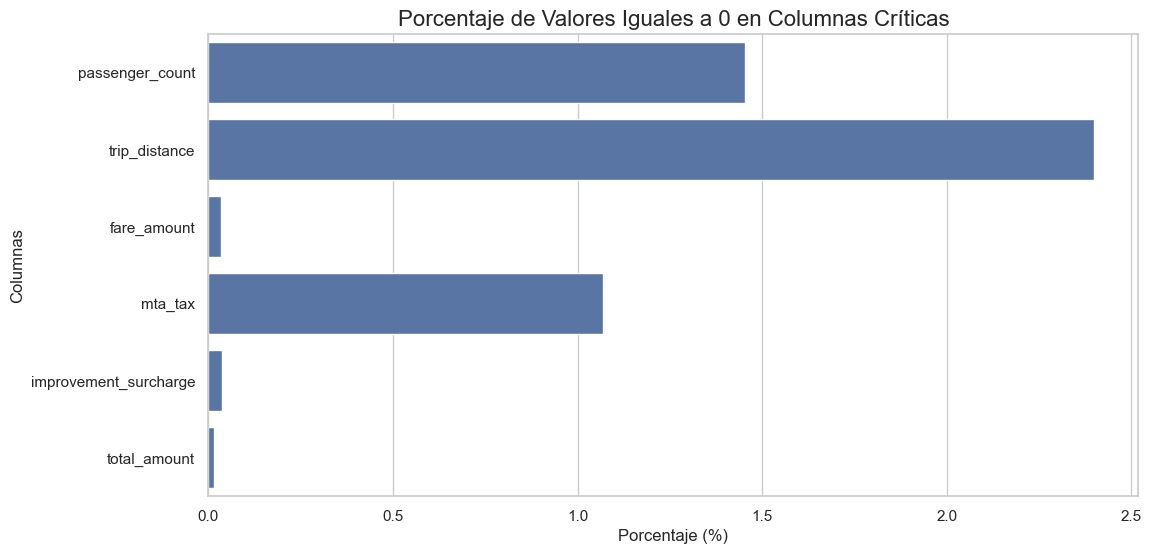

In [62]:
# Gráfico para valores iguales a 0 donde no deberían
plt.figure(figsize=(12, 6))
sns.barplot(data=df_not_should_be_zero, x='Percentage', y='Column')
plt.title('Porcentaje de Valores Iguales a 0 en Columnas Críticas', fontsize=16)
plt.xlabel('Porcentaje (%)', fontsize=12)
plt.ylabel('Columnas', fontsize=12)
plt.show()

In [63]:
# en todas procederemos a completar con la media

columns_to_fill = ['passenger_count', 'trip_distance', 'fare_amount', 'mta_tax', 'improvement_surcharge', 'total_amount']

for column in columns_to_fill:
    mean_value = trips_copy[column].mean()  # Obtener la media de la columna
    trips_copy[column] = trips_copy[column].replace(0, mean_value)  # Reemplazar 0 con la media

# corroboramos

zero_not_allowed = (trips_copy[['passenger_count', 'trip_distance', 'fare_amount', 'mta_tax', 'improvement_surcharge', 'total_amount']] == 0).mean() * 100
print("Valores iguales a 0 donde no deberían")
print(zero_not_allowed)

Valores iguales a 0 donde no deberían
passenger_count                         0.00
trip_distance                           0.00
fare_amount                             0.00
mta_tax                                 0.00
improvement_surcharge                   0.00
total_amount                            0.00
dtype: float64


Valores menores a 0

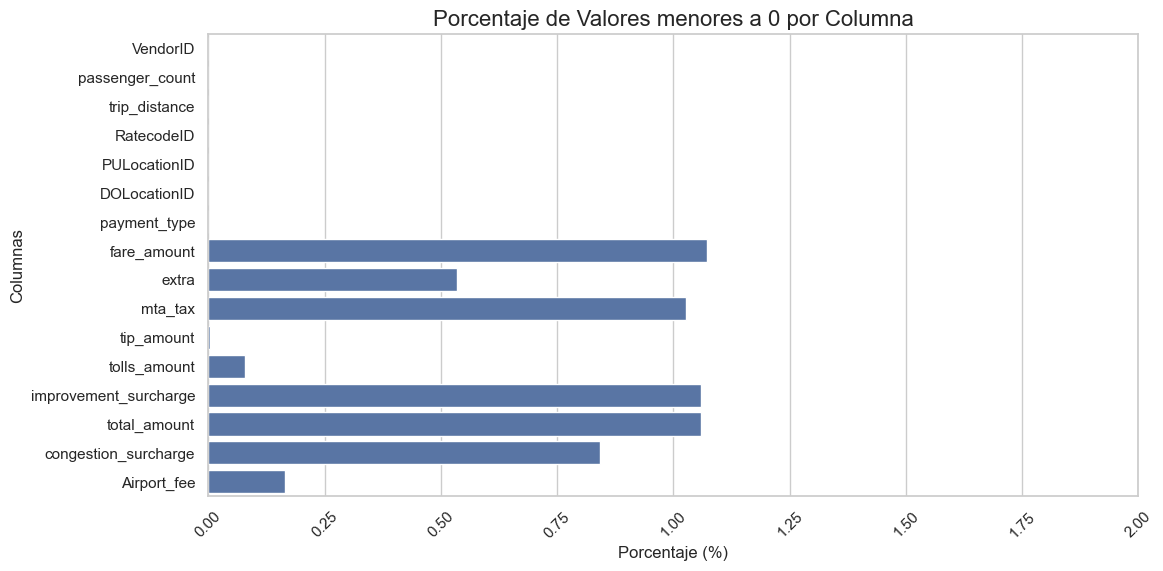

In [64]:
# Crear DataFrame para los gráficos
df_zero_values = pd.DataFrame({
    'Column': valores_menores_a_cero.index,
    'Percentage': valores_menores_a_cero.values
})

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Gráfico para Valores menores a 0
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=df_zero_values, x='Percentage', y='Column')
plt.title('Porcentaje de Valores menores a 0 por Columna', fontsize=16)
plt.xlabel('Porcentaje (%)', fontsize=12)
plt.ylabel('Columnas', fontsize=12)

# Rotar etiquetas del eje y para mejor legibilidad
plt.xticks(rotation=45)
plt.xlim(0, 2)  # Limitar el eje x al 2%

# Mostrar el gráfico
plt.show()

In [65]:
valores_menores_a_cero

VendorID                                0.00
passenger_count                         0.00
trip_distance                           0.00
RatecodeID                              0.00
PULocationID                            0.00
DOLocationID                            0.00
payment_type                            0.00
fare_amount                             1.07
extra                                   0.53
mta_tax                                 1.03
tip_amount                              0.00
tolls_amount                            0.08
improvement_surcharge                   1.06
total_amount                            1.06
congestion_surcharge                    0.84
Airport_fee                             0.17
dtype: float64

In [66]:
# suponemos que fueron un error de tipeo asi que los convertimos a +
# Convertir valores negativos a positivos directamente sobre 'trips_copy'
numerical_cols = trips_copy.select_dtypes(include=['number'])
trips_copy[numerical_cols.columns] = trips_copy[numerical_cols.columns].abs()

# Re-chequear los valores menores a 0 después de la corrección
print("Valores menores a 0 después de la corrección")
valores_menores_a_cero_corr = (trips_copy.select_dtypes(include=['number']) < 0).mean() * 100
print(valores_menores_a_cero_corr)

Valores menores a 0 después de la corrección
VendorID                                0.00
passenger_count                         0.00
trip_distance                           0.00
RatecodeID                              0.00
PULocationID                            0.00
DOLocationID                            0.00
payment_type                            0.00
fare_amount                             0.00
extra                                   0.00
mta_tax                                 0.00
tip_amount                              0.00
tolls_amount                            0.00
improvement_surcharge                   0.00
total_amount                            0.00
congestion_surcharge                    0.00
Airport_fee                             0.00
dtype: float64


Valores que no corresponden a los valores pre-establecidos

In [67]:
# Filtrar las columnas 'RatecodeID' y 'payment_type' para obtener los valores fuera de los permitidos (1, 2, 3, 4, 5, 6)
invalid_values = ~trips_copy[['RatecodeID', 'payment_type']].isin([1, 2, 3, 4, 5, 6])

# Calcular el porcentaje de valores no permitidos
invalid_percentage = invalid_values.mean() * 100
print("Porcentaje de valores no permitidos por columna:")
print(invalid_percentage)

# Para 'RatecodeID', obtener el valor que más aparece (modo)
ratecodeid_mode = trips_copy['RatecodeID'].mode()[0]

# Para 'payment_type', obtener el valor que más aparece (modo)
payment_type_mode = trips_copy['payment_type'].mode()[0]

# Reemplazar valores no permitidos con el valor más frecuente
trips_copy.loc[invalid_values['RatecodeID'], 'RatecodeID'] = ratecodeid_mode
trips_copy.loc[invalid_values['payment_type'], 'payment_type'] = payment_type_mode

# Verificar si el reemplazo se realizó correctamente
invalid_values_after = ~trips_copy[['RatecodeID', 'payment_type']].isin([1, 2, 3, 4, 5, 6])
print("Porcentaje de valores no permitidos tras la corrección:")
print(invalid_values_after.mean() * 100)

Porcentaje de valores no permitidos por columna:
RatecodeID                     0.63
payment_type                   0.00
dtype: float64
Porcentaje de valores no permitidos tras la corrección:
RatecodeID                     0.00
payment_type                   0.00
dtype: float64


In [68]:
# Identificar los valores no permitidos en la columna 'store_and_fwd_flag' (que no sean 'Y' o 'N')
invalid_store_and_fwd_flag = ~trips_copy[['store_and_fwd_flag']].isin(["Y", "N"])

# Calcular el porcentaje de valores no permitidos
invalid_percentage_store_and_fwd = invalid_store_and_fwd_flag.mean() * 100
print("Porcentaje de valores no permitidos en 'store_and_fwd_flag':")
print(invalid_percentage_store_and_fwd)

# Obtener el valor más frecuente (modo) en 'store_and_fwd_flag'
store_and_fwd_flag_mode = trips_copy['store_and_fwd_flag'].mode()[0]

# Reemplazar los valores no permitidos con el valor más frecuente
trips_copy.loc[invalid_store_and_fwd_flag['store_and_fwd_flag'], 'store_and_fwd_flag'] = store_and_fwd_flag_mode

# Verificar si el reemplazo se realizó correctamente
invalid_store_and_fwd_after = ~trips_copy[['store_and_fwd_flag']].isin(["Y", "N"])
print("Porcentaje de valores no permitidos tras la corrección en 'store_and_fwd_flag':")
print(invalid_store_and_fwd_after.mean() * 100)

Porcentaje de valores no permitidos en 'store_and_fwd_flag':
store_and_fwd_flag                   0.00
dtype: float64
Porcentaje de valores no permitidos tras la corrección en 'store_and_fwd_flag':
store_and_fwd_flag                   0.00
dtype: float64


rechequeamos

In [69]:
# Analisis valores Null

# Calcular valores faltantes por columna
missing_values = trips_copy.isnull().sum()
missing_percentage = (missing_values / len(trips_copy)) * 100

# Mostrar el porcentaje de datos faltantes por columna
missing_percentage

VendorID                                0.00
tpep_pickup_datetime                    0.00
tpep_dropoff_datetime                   0.00
passenger_count                         0.00
trip_distance                           0.00
RatecodeID                              0.00
store_and_fwd_flag                      0.00
PULocationID                            0.00
DOLocationID                            0.00
payment_type                            0.00
fare_amount                             0.00
extra                                   0.00
mta_tax                                 0.00
tip_amount                              0.00
tolls_amount                            0.00
improvement_surcharge                   0.00
total_amount                            0.00
congestion_surcharge                    0.00
Airport_fee                             0.00
dtype: float64

In [70]:
# Valores iguales a 0
print("Valores iguales a 0")
valores_cero = (trips_copy == 0).mean() * 100
print(valores_cero, "\n")

# Valores iguales a 0 donde no deberían
zero_not_allowed = (trips_copy[['passenger_count', 'trip_distance', 'fare_amount', 'mta_tax', 'improvement_surcharge', 'total_amount']] == 0).mean() * 100
print("Valores iguales a 0 donde no deberían")
print(zero_not_allowed)

Valores iguales a 0
VendorID                                0.00
tpep_pickup_datetime                    0.00
tpep_dropoff_datetime                   0.00
passenger_count                         0.00
trip_distance                           0.00
RatecodeID                              0.00
store_and_fwd_flag                      0.00
PULocationID                            0.00
DOLocationID                            0.00
payment_type                            0.00
fare_amount                             0.00
extra                                  38.87
mta_tax                                 0.00
tip_amount                             24.73
tolls_amount                           91.46
improvement_surcharge                   0.00
total_amount                            0.00
congestion_surcharge                    8.64
Airport_fee                            90.10
dtype: float64 

Valores iguales a 0 donde no deberían
passenger_count                         0.00
trip_distance            

In [71]:
# Filtrar solo las columnas numéricas
numerical_cols = trips_copy.select_dtypes(include=['number'])

# Valores menores a 0
print("Valores menores a 0")
valores_menores_a_cero = (numerical_cols < 0).mean() * 100
print(valores_menores_a_cero)


Valores menores a 0
VendorID                                0.00
passenger_count                         0.00
trip_distance                           0.00
RatecodeID                              0.00
PULocationID                            0.00
DOLocationID                            0.00
payment_type                            0.00
fare_amount                             0.00
extra                                   0.00
mta_tax                                 0.00
tip_amount                              0.00
tolls_amount                            0.00
improvement_surcharge                   0.00
total_amount                            0.00
congestion_surcharge                    0.00
Airport_fee                             0.00
dtype: float64


### **C-**
Valores atípicos


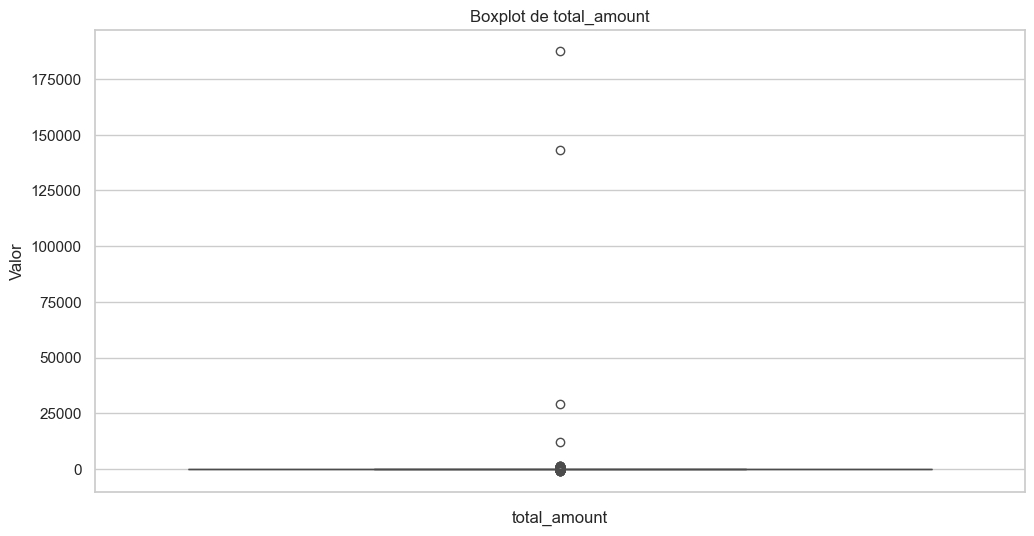

datos filtrados: 8477689
datos outliers: 100350
datos originales: 8578039
despues de filtrar


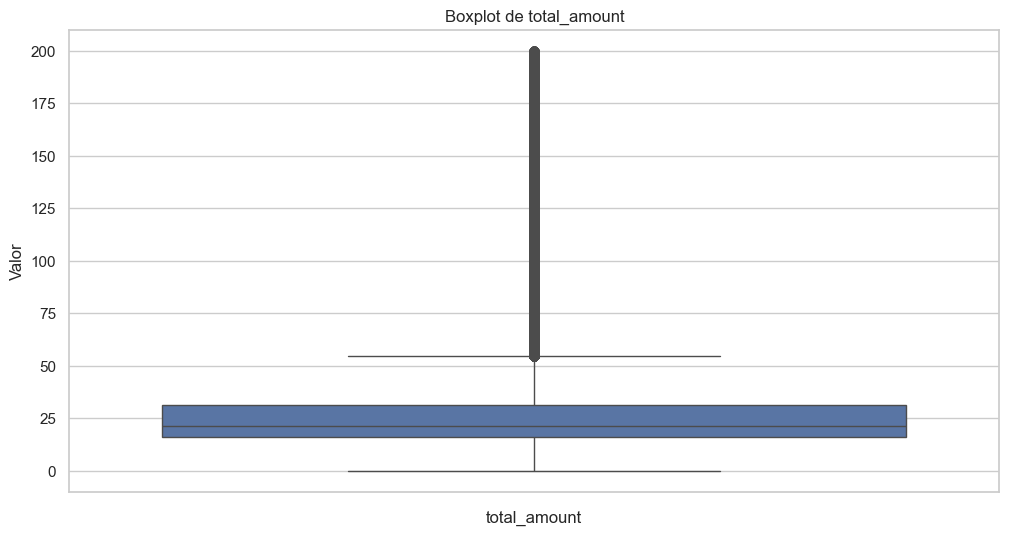

In [72]:
copy_trips = trips.copy()
# hago un boxplot para cada variable y me fijo que queda afuera de los bigotes
filtered_trips = copy_trips[copy_trips['total_amount'] <= 200]
filtered_trips = filtered_trips[filtered_trips['total_amount'] > 0]

boxplot(copy_trips, 'total_amount')
print("datos filtrados: " + str (len(filtered_trips)))
print("datos outliers: " + str(len(copy_trips) - len(filtered_trips)))
print("datos originales: " + str(len(copy_trips)))
print("despues de filtrar")
boxplot(filtered_trips, 'total_amount')
copy_trips = filtered_trips

Filtro los total_amount menores a 0 pq no tiene sentido q sean negativos. Tambien filtro los mayores a 200, considerando q el viaje mas caro (al aeropuerto), no puede salir mas de 200 dolares.


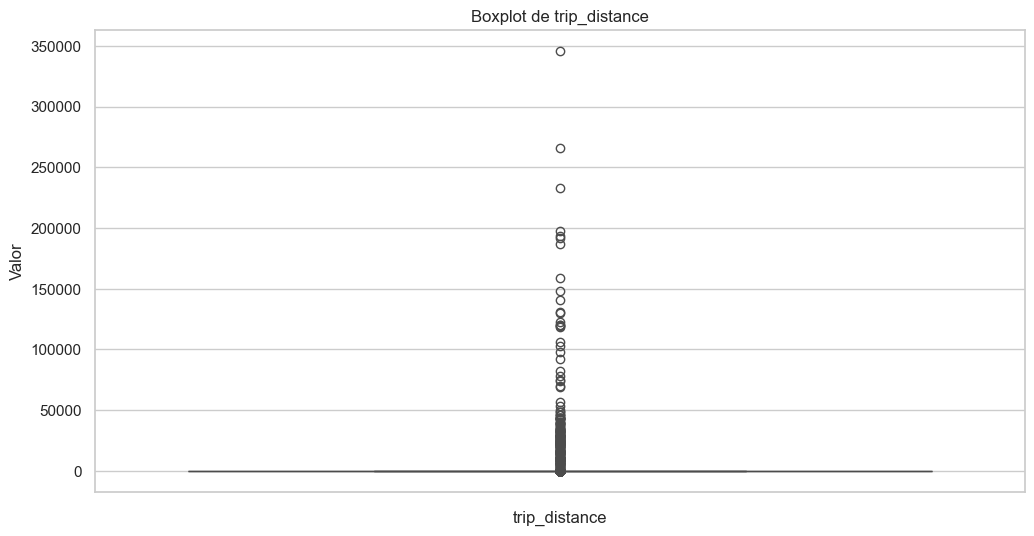

datos no tenidos en cuenta: 194769
datos originales: 8477689
despues de limpieza de datos


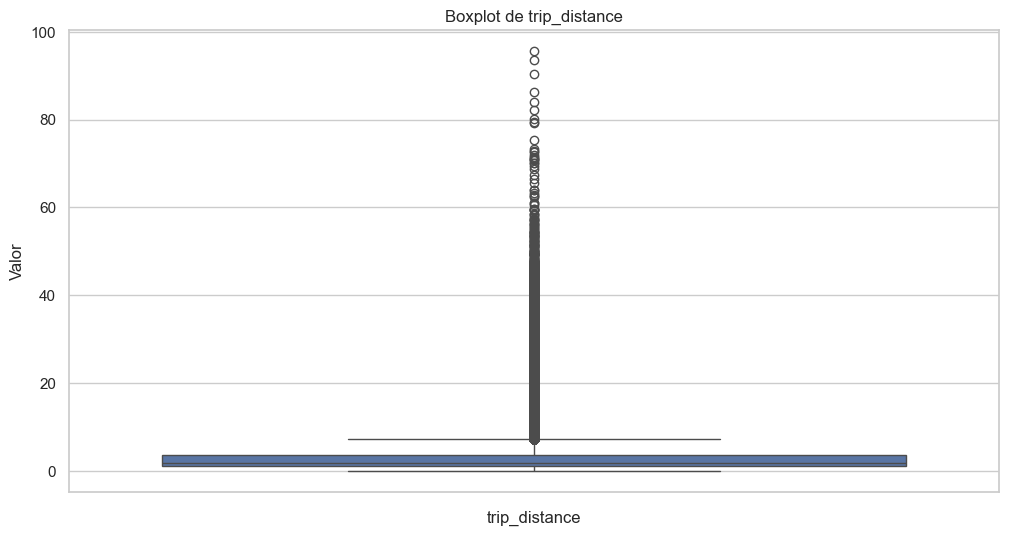

In [73]:
trip_filtered = copy_trips[copy_trips['trip_distance'] < 100] #160 km
trip_filtered = trip_filtered[trip_filtered['trip_distance'] > 0]
boxplot(copy_trips, 'trip_distance')
print("datos no tenidos en cuenta: " + str (len(copy_trips) - len(trip_filtered)))
print("datos originales: " + str(len(copy_trips)))
print("despues de limpieza de datos")
boxplot(trip_filtered, 'trip_distance')
copy_trips = trip_filtered

una distancia mayor a 100 millas en un estado de nueva york es atipico. El viaje mas lejano al JFK es de 18 millas

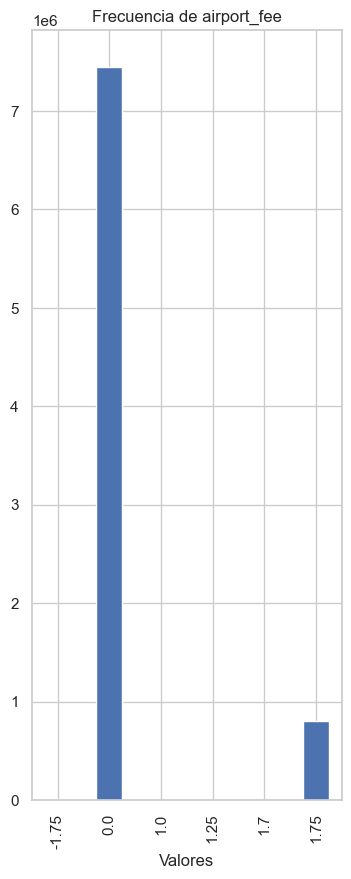

datos sin sentido: 0
datos originales: 8282920


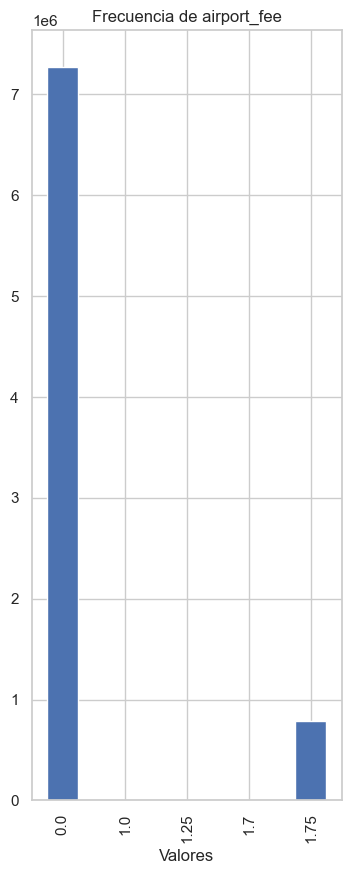

In [74]:
plt.figure(figsize=(4,10))

trips.value_counts('Airport_fee', sort=False).plot.bar()
  # Añadir título y etiquetas
plt.title('Frecuencia de airport_fee')
plt.xlabel('Valores')
  # Mostrar el gráfico
plt.show()

trips_filtered = copy_trips[copy_trips['Airport_fee'] < 0]
print("datos sin sentido: " + str (len(trips_filtered)))
print("datos originales: " + str(len(copy_trips)))

copy_trips['Airport_fee'] = np.where(copy_trips['Airport_fee'] < 0, 1.75, copy_trips['Airport_fee'])

plt.figure(figsize=(4,10))
copy_trips.value_counts('Airport_fee', sort=False).plot.bar()
  # Añadir título y etiquetas
plt.title('Frecuencia de airport_fee')
plt.xlabel('Valores')
  # Mostrar el gráfico
plt.show()

se cobra 1.75 solo si toman el taxi en un aeropuerto. el valor negativo no tiene sentido, lo cambio a 1.75

In [75]:
filtered_trips = copy_trips[copy_trips['tpep_pickup_datetime'] < copy_trips['tpep_dropoff_datetime']]
print("datos con sentido:" + str(len(filtered_trips)))
copy_trips = filtered_trips

datos con sentido:8282273


In [76]:
filtered_trips = copy_trips.loc[(copy_trips['tpep_pickup_datetime'].dt.year == 2023) | (copy_trips['tpep_dropoff_datetime'].dt.year == 2023)]
print("datos sin sentido:" + str(len(copy_trips) - len(filtered_trips)))
copy_trips = filtered_trips

datos sin sentido:14


In [77]:
filtered_trips = copy_trips.loc[((copy_trips['tpep_pickup_datetime'].dt.month == 7) | (copy_trips['tpep_pickup_datetime'].dt.month == 8) | (copy_trips['tpep_pickup_datetime'].dt.month == 9)) & ((copy_trips['tpep_dropoff_datetime'].dt.month == 7) | (copy_trips['tpep_dropoff_datetime'].dt.month == 8) | (copy_trips['tpep_dropoff_datetime'].dt.month == 9))]
print("datos sin sentido:" + str(len(copy_trips) - len(filtered_trips)))
copy_trips = filtered_trips

datos sin sentido:1722


No tiene sentido que la hora de subida sea mayor q la de bajada. no tiene sentido que no sean viajes del 2023 ni de otros meses que no son parte de nuestro dataset (consideramos erroneos los que empezaron o terminaron en otro mes)

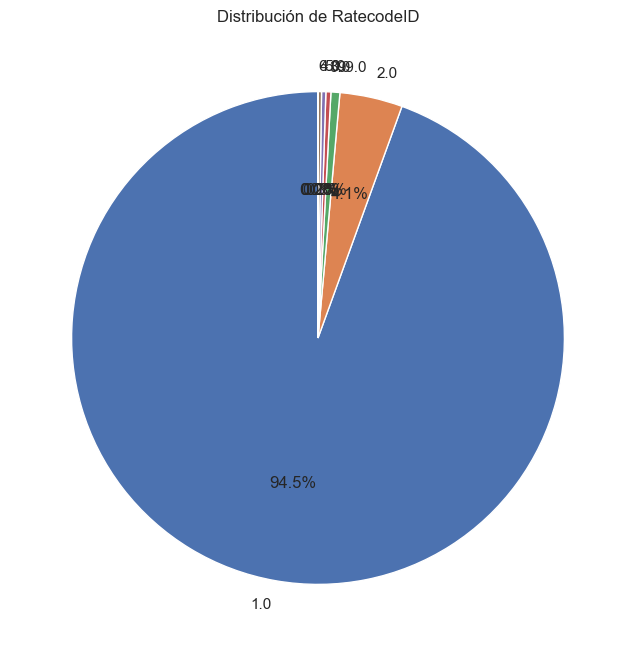

datos sin sentido:47087


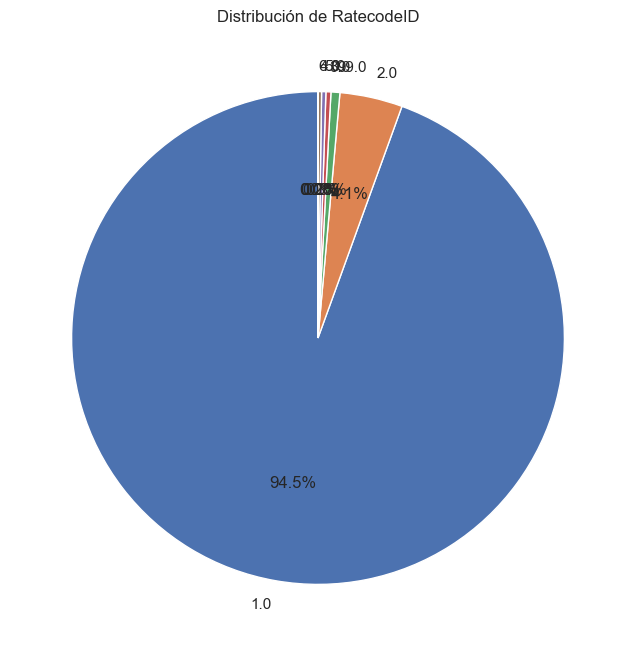

In [78]:
filtered_trips = copy_trips.loc[(copy_trips['RatecodeID'] > 6) | (copy_trips['RatecodeID'] < 1) ]

pie(copy_trips, 'RatecodeID')

print("datos sin sentido:" + str(len(filtered_trips)))

copy_trips['RatecodeID'] = np.where(((copy_trips['RatecodeID'] > 6) | (copy_trips['RatecodeID'] < 1)) & (copy_trips['DOLocationID']==250), 4, copy_trips['RatecodeID'])
copy_trips['RatecodeID'] = np.where(((copy_trips['RatecodeID'] > 6) | (copy_trips['RatecodeID'] < 1)) & (copy_trips['DOLocationID']==132), 2, copy_trips['RatecodeID'])
copy_trips['RatecodeID'] = np.where(((copy_trips['RatecodeID'] > 6) | (copy_trips['RatecodeID'] < 1)) & (copy_trips['DOLocationID']==1), 3, copy_trips['RatecodeID'])
copy_trips['RatecodeID'] = np.where(((copy_trips['RatecodeID'] > 6) | (copy_trips['RatecodeID'] < 1)) & (copy_trips['passenger_count']>4), 6, copy_trips['RatecodeID'])
pie(copy_trips, 'RatecodeID')


los id van de 1 a 6, se intentan cambiar los valores sin sentido mirando el codigo DOLocationID

<Axes: xlabel='congestion_surcharge'>

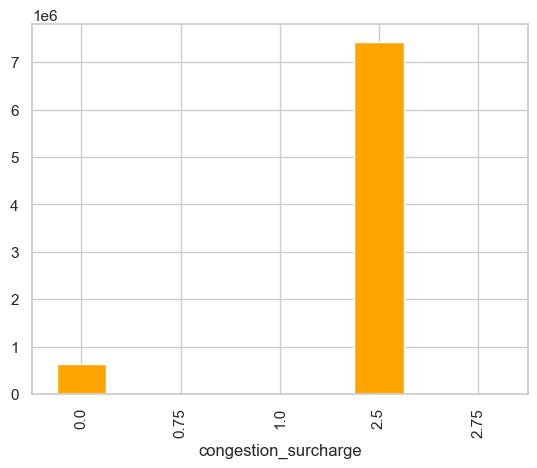

In [79]:
copy_trips.value_counts('congestion_surcharge', sort=False).plot.bar(color='orange')

todos son valores tienen sentido

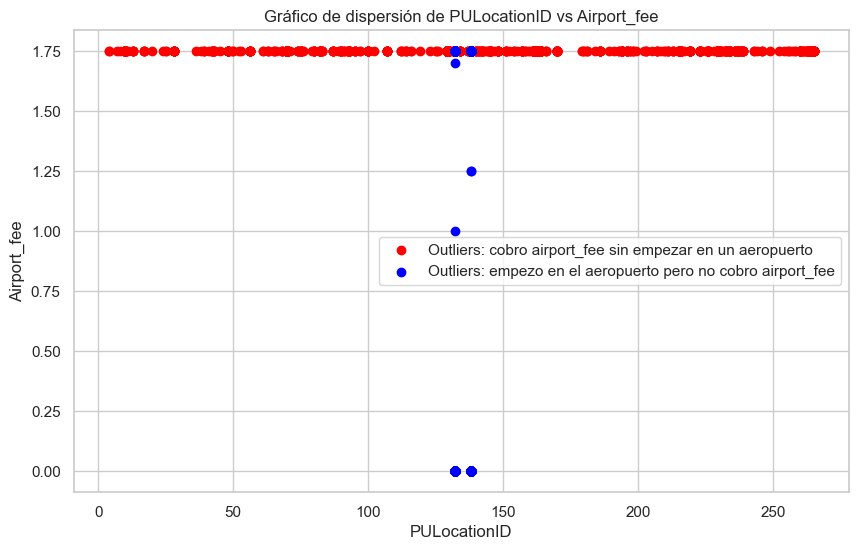

519825


In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(copy_trips[~((copy_trips['PULocationID'] == 132) | (copy_trips['PULocationID'] == 138)) & (copy_trips['Airport_fee'] == 1.75)]['PULocationID'],
            copy_trips[~((copy_trips['PULocationID'] == 132) | (copy_trips['PULocationID'] == 138)) & (copy_trips['Airport_fee'] == 1.75)]['Airport_fee'],
            color='red', label='Outliers: cobro airport_fee sin empezar en un aeropuerto')
plt.scatter(copy_trips[(copy_trips['PULocationID'] == 132) | (copy_trips['PULocationID'] == 138)]['PULocationID'],
            copy_trips[(copy_trips['PULocationID'] == 132) | (copy_trips['PULocationID'] == 138)]['Airport_fee'],
            color='blue', label='Outliers: empezo en el aeropuerto pero no cobro airport_fee')
plt.xlabel('PULocationID')
plt.ylabel('Airport_fee')
plt.title('Gráfico de dispersión de PULocationID vs Airport_fee')
plt.legend()
plt.show()
outliers_count = len(copy_trips[~((copy_trips['PULocationID'] == 132) | (copy_trips['PULocationID'] == 138)) & (copy_trips['Airport_fee'] == 1.75)]) + len(copy_trips[(copy_trips['PULocationID'] == 132) | (copy_trips['PULocationID'] == 138) & (copy_trips['Airport_fee'] != 1.75)])
print(outliers_count)
copy_trips = copy_trips[~(~((copy_trips['PULocationID'] == 132) | (copy_trips['PULocationID'] == 138)) & (copy_trips['Airport_fee'] == 1.75))]
copy_trips = copy_trips[~((copy_trips['PULocationID'] == 132) | (copy_trips['PULocationID'] == 138) & (copy_trips['Airport_fee'] != 1.75))]


### **D-**
Algunas de las variables que se pueden incorporar trabajando los datos son:


*   Tiempo del viaje (Haciendo la resta entre fecha y hora de llegada menos Fecha y hora de partida)
*   Precio neto por milla (Precio Neto medido/Millas Recorridas)
*   Precio total por milla (Precio Total/Millas recorridas)
*   Tipo de congesiton

Por otro lado, variables que se podría agregar incorporando otros datos serían:


*   Si lleva equipaje y se cobtra aparte
*   Si se reselvó el viaje y esto tiene algún tipo de costo/beneficio
*   Nombre de los lugares establecidos como numéricos en el dataset
*   Area de servicio en la que se operó

Con la ubicación y los datos de precios que ya se tienen se podrían calcular no solo los lugares más ocupados por horario sino que también costos promedios de viajes entre barrios.



In [81]:
agg_trips=copy_trips.copy()

In [82]:
agg_trips['duration']=agg_trips['tpep_dropoff_datetime']-agg_trips['tpep_pickup_datetime']
agg_trips['mile_amount_net'] = np.where(agg_trips['trip_distance'].notnull() & agg_trips['trip_distance']!=0,agg_trips['fare_amount']/agg_trips['trip_distance'],np.nan)
agg_trips['mile_amount_total'] = np.where(agg_trips['trip_distance'].notnull() & agg_trips['trip_distance']!=0,agg_trips['total_amount']/agg_trips['trip_distance'],np.nan)
miles_average=agg_trips['mile_amount_net'].mean()
miles_threshold=miles_average*0.05
agg_trips['congestion_type'] = pd.cut(agg_trips['mile_amount_net'], bins=[-float('inf'), miles_average-miles_threshold,miles_average+miles_threshold,float('inf')],
                                      labels=['Low','Mild','High'],
                                      include_lowest=True)
agg_trips['congestion_type_charge'] = pd.cut(agg_trips['mile_amount_net'], bins=[-float('inf'), 0.5,1.5,float('inf')],
                                      labels=['Low','Mild','High'],
                                      include_lowest=True)

In [83]:
taxiZone=pd.read_csv('https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv')

In [84]:
taxiZone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [85]:
agg_trips=agg_trips.join(taxiZone.set_index('LocationID'), on='PULocationID')
agg_trips=agg_trips.rename(columns={"Borough": "PUBorough", "Zone": "PUZone","service_zone":"PUservice_zone"})
agg_trips=agg_trips.join(taxiZone.set_index('LocationID'), on='DOLocationID')
agg_trips=agg_trips.rename(columns={"Borough": "DOBorough", "Zone": "DOZone","service_zone":"DOservice_zone"});

In [86]:
from datetime import time

In [87]:
agg_trips['PUtime_day']=np.where(((agg_trips['tpep_pickup_datetime'].dt.time >=time.fromisoformat('05:00:00')) & (agg_trips['tpep_pickup_datetime'].dt.time<time.fromisoformat('13:00:00'))), 'Morning', (np.where(((agg_trips['tpep_pickup_datetime'].dt.time >=time.fromisoformat('13:00:00')) & (agg_trips['tpep_pickup_datetime'].dt.time<time.fromisoformat('21:00:00'))),'Afternoon','Night')))
agg_trips['DOtime_day']=np.where(((agg_trips['tpep_dropoff_datetime'].dt.time >=time.fromisoformat('05:00:00')) & (agg_trips['tpep_dropoff_datetime'].dt.time<time.fromisoformat('13:00:00'))), 'Morning', (np.where(((agg_trips['tpep_dropoff_datetime'].dt.time >=time.fromisoformat('13:00:00')) & (agg_trips['tpep_dropoff_datetime'].dt.time<time.fromisoformat('21:00:00'))),'Afternoon','Night')))

In [88]:
agg_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7760712 entries, 0 to 2846719
Data columns (total 32 columns):
 #   Column                  Dtype          
---  ------                  -----          
 0   VendorID                int32          
 1   tpep_pickup_datetime    datetime64[us] 
 2   tpep_dropoff_datetime   datetime64[us] 
 3   passenger_count         float64        
 4   trip_distance           float64        
 5   RatecodeID              float64        
 6   store_and_fwd_flag      object         
 7   PULocationID            int32          
 8   DOLocationID            int32          
 9   payment_type            int64          
 10  fare_amount             float64        
 11  extra                   float64        
 12  mta_tax                 float64        
 13  tip_amount              float64        
 14  tolls_amount            float64        
 15  improvement_surcharge   float64        
 16  total_amount            float64        
 17  congestion_surcharge    float64 

### **E-**
1. ¿Existe una manera de caracterizar los lugares más recurrentes para inicio/fin de viaje?
2. Recorridos entre zonas con más frecuencia
2. ¿Cómo son los viajes típicamente en distancia y tiempo?

3. ¿Cómo son los viajes típicamente en distancia y tiempo según el horario y/o el día de la semana?
5.   Viajes entre LocationsID mas costosos
6.   Horarios con mayor congetion general
7.   Congestion para cada par de LoctionIDs
8. Relacion entre la propina y la zona donde termina el viaje

1. Los lugares más recurrentes de partida

In [89]:
agg_trips.value_counts(['PULocationID','PUZone'],sort=True,dropna=False)


PULocationID  PUZone                      
161           Midtown Center                  385758
237           Upper East Side South           363227
236           Upper East Side North           309320
186           Penn Station/Madison Sq West    301355
162           Midtown East                    300455
                                               ...  
99            Freshkills Park                      2
204           Rossville/Woodrow                    2
115           Grymes Hill/Clifton                  2
176           Oakwood                              1
172           New Dorp/Midland Beach               1
Name: count, Length: 259, dtype: int64

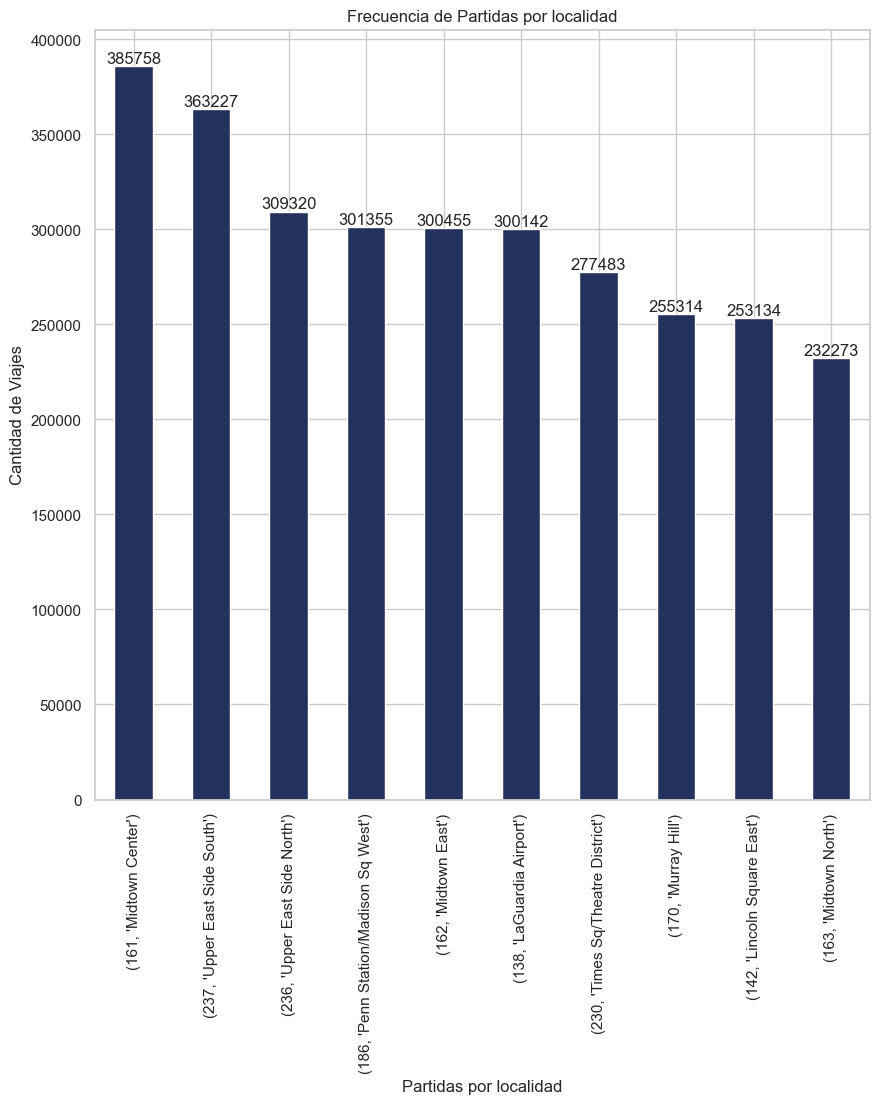

In [90]:
top10loc=agg_trips.value_counts(['PULocationID','PUZone'],sort=True,dropna=False).head(10)

plt.figure(figsize=(10, 10))
top10loc.plot(kind='bar', color='#23315d')

# Añadir título y etiquetas
plt.title('Frecuencia de Partidas por localidad')
plt.xlabel('Partidas por localidad')
plt.ylabel('Cantidad de Viajes')

# etiquetas a las barras
for index, value in enumerate(top10loc):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(ticks=range(len(top10loc.index)), labels=top10loc.index, rotation=90)
plt.show()

Para las llegadas:

In [91]:
agg_trips.value_counts(['DOLocationID','DOZone'],sort=True,dropna=False)


DOLocationID  DOZone                                       
236           Upper East Side North                            320356
237           Upper East Side South                            319131
161           Midtown Center                                   318473
230           Times Sq/Theatre District                        245403
170           Murray Hill                                      243282
                                                                ...  
30            Broad Channel                                        13
99            Freshkills Park                                       8
105           Governor's Island/Ellis Island/Liberty Island         8
2             Jamaica Bay                                           4
110           Great Kills Park                                      1
Name: count, Length: 262, dtype: int64

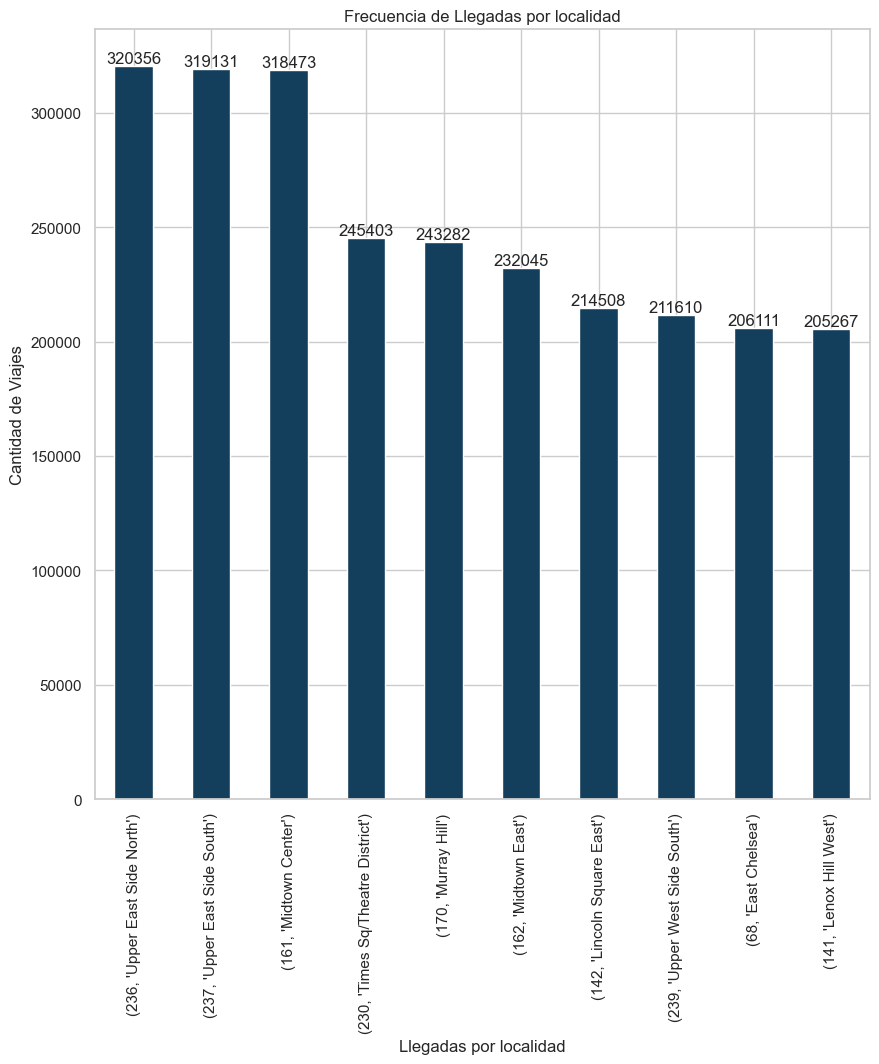

In [92]:
top10loc=agg_trips.value_counts(['DOLocationID','DOZone'],sort=True,dropna=False).head(10)

plt.figure(figsize=(10, 10))
top10loc.plot.bar(color='#133f5d')

# Añadir título y etiquetas
plt.title('Frecuencia de Llegadas por localidad')
plt.xlabel('Llegadas por localidad')
plt.ylabel('Cantidad de Viajes')

# etiquetas a las barras
for index, value in enumerate(top10loc):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(ticks=range(len(top10loc.index)), labels=top10loc.index, rotation=90)
plt.show()

2. Pares más comunes:

In [93]:
locationPairs=agg_trips.value_counts(['PUZone','DOZone'],sort=True,dropna=False)
locationPairs

PUZone                         DOZone                           
NaN                            NaN                                  60226
Upper East Side South          Upper East Side North                48208
Upper East Side North          Upper East Side South                40787
Upper East Side South          Upper East Side South                34746
Upper East Side North          Upper East Side North                30638
                                                                    ...  
Long Island City/Queens Plaza  Glendale                                 1
Bushwick North                 University Heights/Morris Heights        1
Long Island City/Queens Plaza  Highbridge                               1
Bushwick North                 Upper East Side South                    1
Park Slope                     Woodside                                 1
Name: count, Length: 31784, dtype: int64

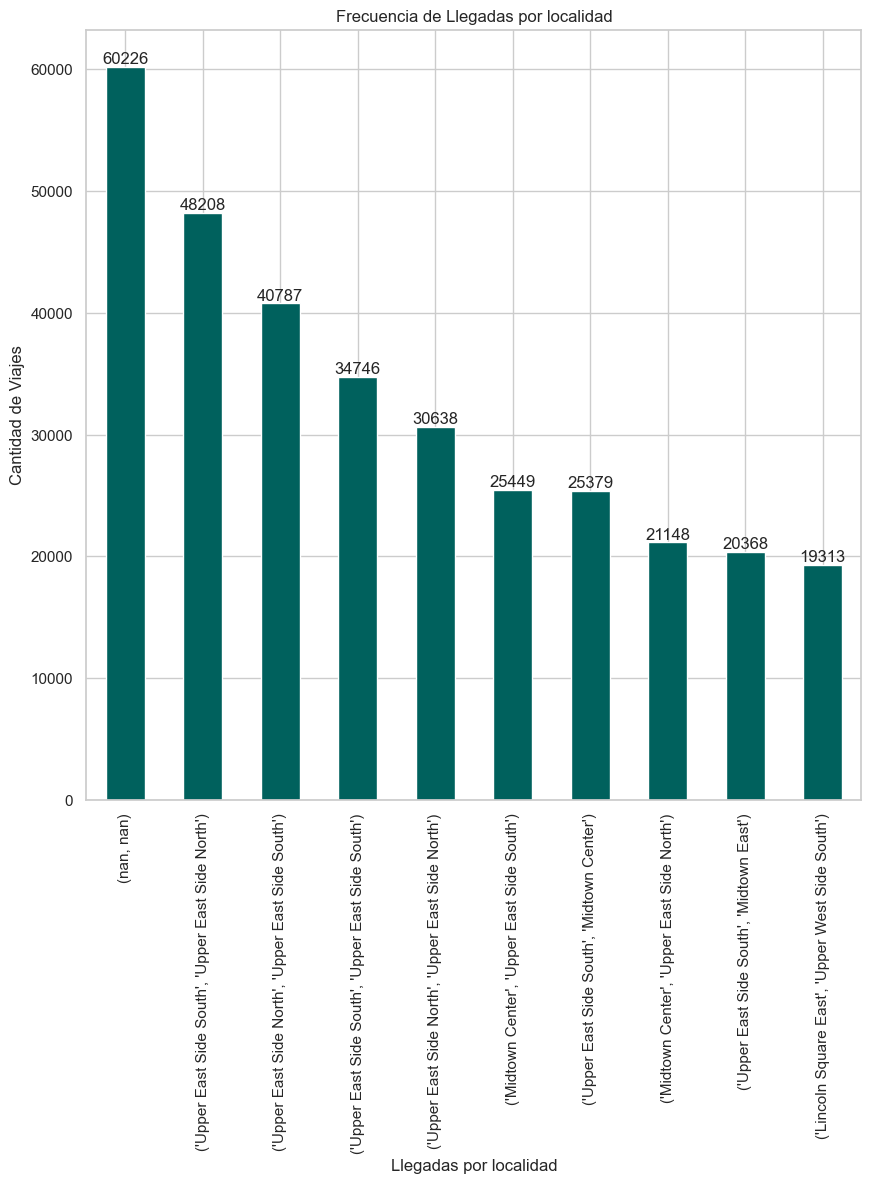

In [94]:
top10loc=locationPairs.head(10)
plt.figure(figsize=(10, 10))
top10loc.plot.bar(color='#00615d')

# Añadir título y etiquetas
plt.title('Frecuencia de Llegadas por localidad')
plt.xlabel('Llegadas por localidad')
plt.ylabel('Cantidad de Viajes')

# etiquetas a las barras
for index, value in enumerate(top10loc):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(ticks=range(len(top10loc.index)), labels=top10loc.index, rotation=90)
plt.show()

3.

<Axes: xlabel='duration'>

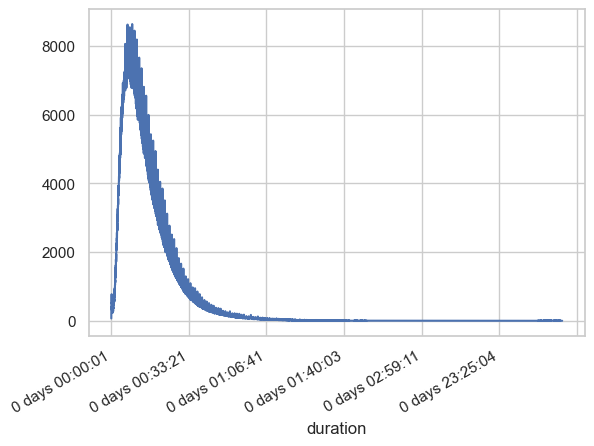

In [95]:
agg_trips.value_counts('duration',sort=False,dropna=False).plot.line()

<Axes: xlabel='trip_distance'>

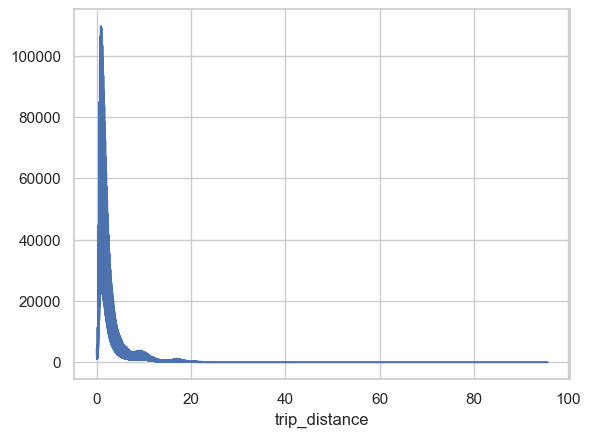

In [96]:
agg_trips.value_counts('trip_distance',sort=False,dropna=False).plot.line()

<Axes: xlabel='trip_distance'>

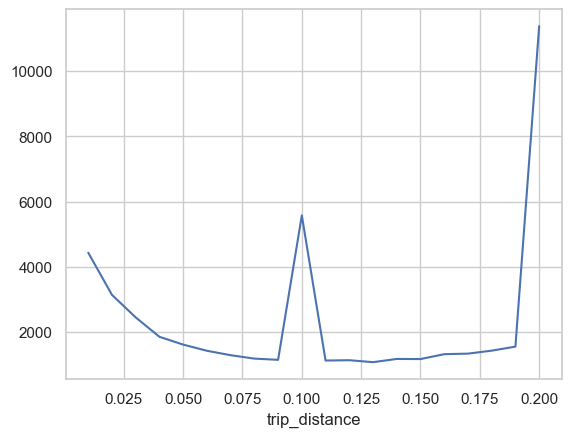

In [97]:
agg_trips.value_counts('trip_distance',sort=False,dropna=False).head(20).plot.line()

In [98]:
agg_trips['tpep_pickup_datetime'].dt.time

0          00:29:59
1          00:03:25
2          00:38:29
3          00:14:16
4          00:11:15
             ...   
2846714    23:04:42
2846715    23:08:00
2846716    23:28:48
2846717    23:31:12
2846719    23:03:35
Name: tpep_pickup_datetime, Length: 7760712, dtype: object

In [99]:
agg_trips.value_counts('PUtime_day')

PUtime_day
Afternoon    3839012
Morning      2234402
Night        1687298
Name: count, dtype: int64

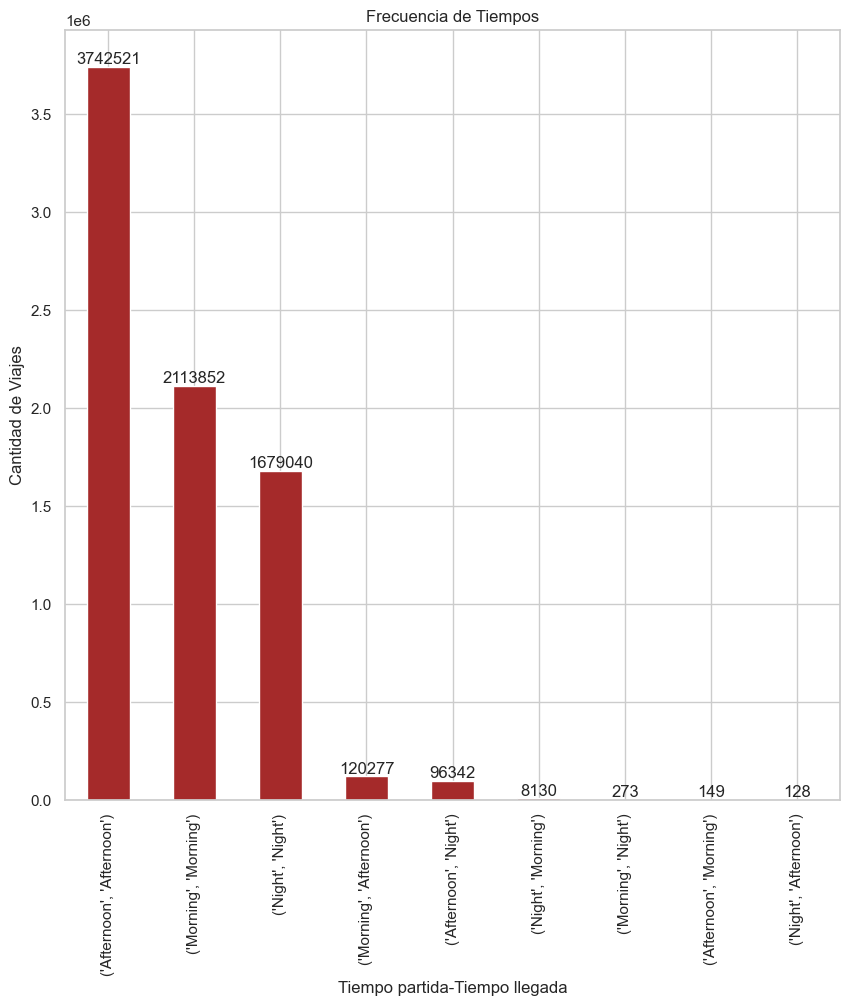

In [100]:
timetypes=agg_trips.value_counts(['PUtime_day','DOtime_day'],sort=True,dropna=False).head(10)

plt.figure(figsize=(10, 10))
timetypes.plot.bar(color='brown')

# Añadir título y etiquetas
plt.title('Frecuencia de Tiempos')
plt.xlabel('Tiempo partida-Tiempo llegada')
plt.ylabel('Cantidad de Viajes')

# etiquetas a las barras
for index, value in enumerate(timetypes):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(ticks=range(len(timetypes.index)), labels=timetypes.index, rotation=90)
plt.show()

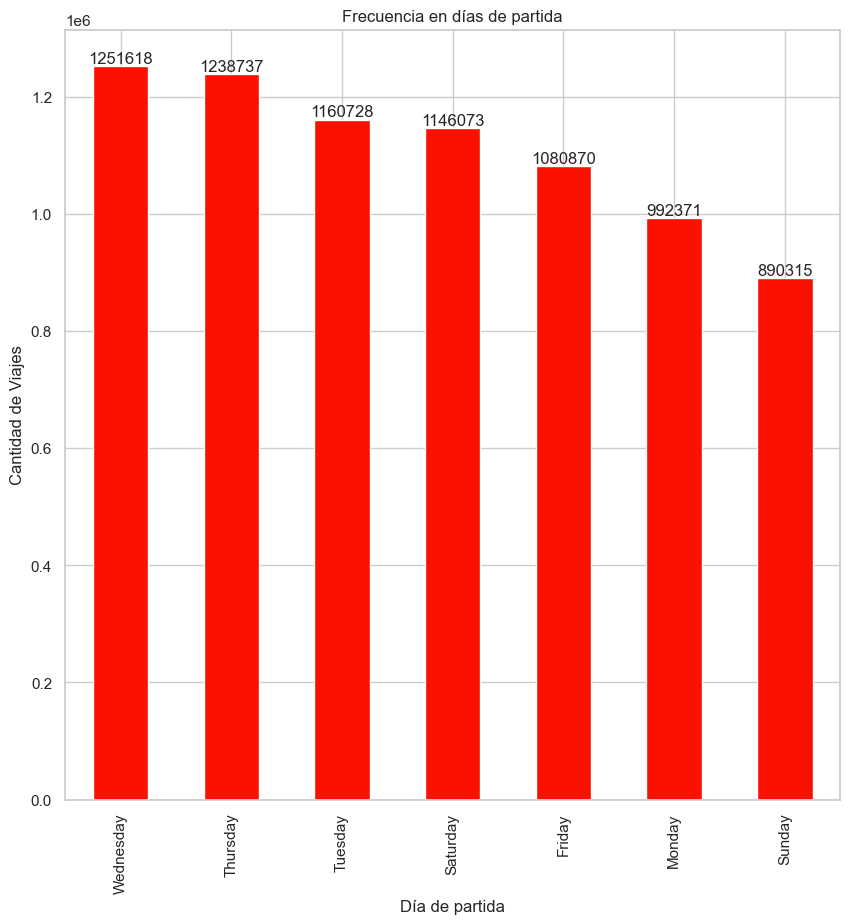

In [101]:
PUday=agg_trips['tpep_pickup_datetime'].dt.day_name().value_counts(sort=True,dropna=False).head(10)

plt.figure(figsize=(10, 10))
PUday.plot.bar(color='#fa1100')

# Añadir título y etiquetas
plt.title('Frecuencia en días de partida')
plt.xlabel('Día de partida')
plt.ylabel('Cantidad de Viajes')

# etiquetas a las barras
for index, value in enumerate(PUday):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(ticks=range(len(PUday.index)), labels=PUday.index, rotation=90)
plt.show()

5-

In [102]:
agg_trips.groupby(['PUZone','DOZone'], group_keys=False)[['mile_amount_total']].mean()

mile_amount_total
PUZone                  DOZone                                      
Allerton/Pelham Gardens Allerton/Pelham Gardens               113.19
                        Astoria                                 5.32
                        Belmont                                 8.31
                        Bensonhurst East                        3.46
                        Bronxdale                              15.52
...                                                              ...
Yorkville West          Woodlawn/Wakefield                      4.94
                        Woodside                                6.79
                        World Trade Center                      5.72
                        Yorkville East                         25.83
                        Yorkville West                         55.85

[31461 rows x 1 columns]

In [103]:
agg_trips.groupby(['PUZone','DOZone'], group_keys=False)[['mile_amount_total']].mean().nlargest(20, 'mile_amount_total', keep='all')

mile_amount_total
PUZone                       DOZone                                              
Stapleton                    Stapleton                                   9,619.00
South Ozone Park             Washington Heights South                    4,617.05
Newark Airport               Newark Airport                              3,033.39
Highbridge Park              Washington Heights South                    2,007.52
Manhattan Beach              Marine Park/Floyd Bennett Field             1,966.07
Kew Gardens                  Richmond Hill                               1,803.90
                             Kew Gardens                                 1,744.94
Gowanus                      Gowanus                                     1,703.10
Cypress Hills                Cypress Hills                               1,660.18
Kensington                   Sunnyside                                   1,430.50
South Ozone Park             South Ozone Park                            1,407.91
Howard Beach                 Howard Beach                                1,131.19
Flushing Meadows-Corona Park Kew Gardens                                 1,123.81
Richmond Hill                Richmond Hill                               1,074.49
Manhattan Beach              Manhattan Beach                             1,060.70
College Point                College Point                               1,055.90
Saint George/New Brighton    Saint George/New Brighton                   1,022.81
Upper East Side South        Arden Heights                               1,022.60
Great Kills                  Great Kills                                 1,008.26
Red Hook                     Red Hook                                      983.86

6-

In [104]:
df=pd.DataFrame(data=agg_trips.loc[:,['congestion_type','tpep_pickup_datetime']])
df['tpep_pickup_datetime']=df['tpep_pickup_datetime'].dt.hour
df.value_counts(sort=True).head(20)

congestion_type  tpep_pickup_datetime
Low              18                      454535
                 19                      419471
                 17                      419190
                 21                      391907
                 20                      389380
                 16                      381204
                 15                      376079
                 14                      370010
                 22                      358142
                 13                      349783
                 12                      341979
                 11                      322466
                 10                      307828
                 9                       288901
                 23                      281802
                 8                       265420
                 0                       200980
                 7                       191725
                 1                       139787
                 6                       100057
Na

/var/folders/tj/6r6lk3n90794wvh1l2dmsmv00000gn/T/ipykernel_2507/1395618656.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['congestion_type', 'tpep_pickup_datetime']).size().unstack(fill_value=0)


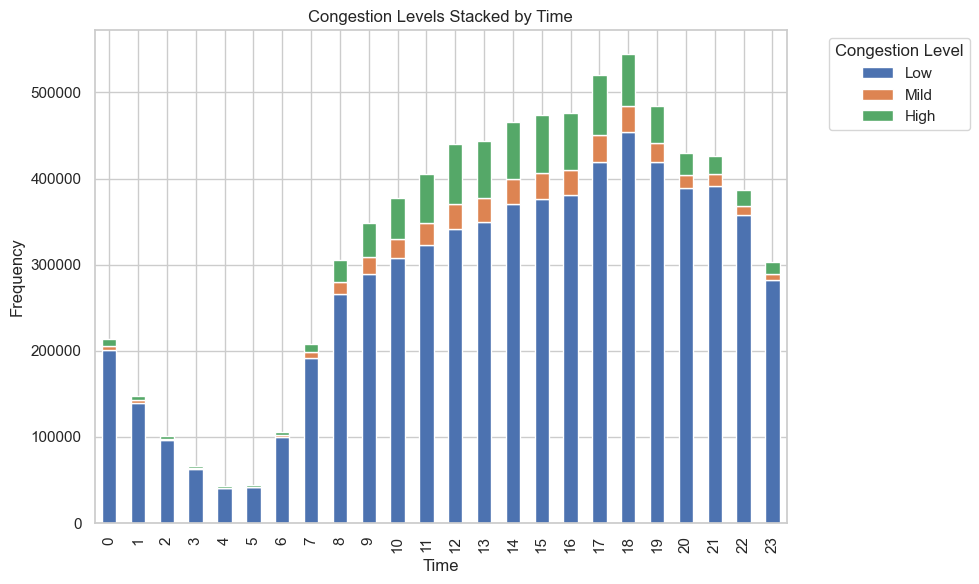

In [105]:
df = df.groupby(['congestion_type', 'tpep_pickup_datetime']).size().unstack(fill_value=0)

df.T.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Congestion Levels Stacked by Time')
plt.legend(title='Congestion Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()

In [106]:
agg_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7760712 entries, 0 to 2846719
Data columns (total 32 columns):
 #   Column                  Dtype          
---  ------                  -----          
 0   VendorID                int32          
 1   tpep_pickup_datetime    datetime64[us] 
 2   tpep_dropoff_datetime   datetime64[us] 
 3   passenger_count         float64        
 4   trip_distance           float64        
 5   RatecodeID              float64        
 6   store_and_fwd_flag      object         
 7   PULocationID            int32          
 8   DOLocationID            int32          
 9   payment_type            int64          
 10  fare_amount             float64        
 11  extra                   float64        
 12  mta_tax                 float64        
 13  tip_amount              float64        
 14  tolls_amount            float64        
 15  improvement_surcharge   float64        
 16  total_amount            float64        
 17  congestion_surcharge    float64 

/var/folders/tj/6r6lk3n90794wvh1l2dmsmv00000gn/T/ipykernel_2507/3674773634.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = agg_trips.groupby(['congestion_type', 'PUtime_day']).size().unstack(fill_value=0)


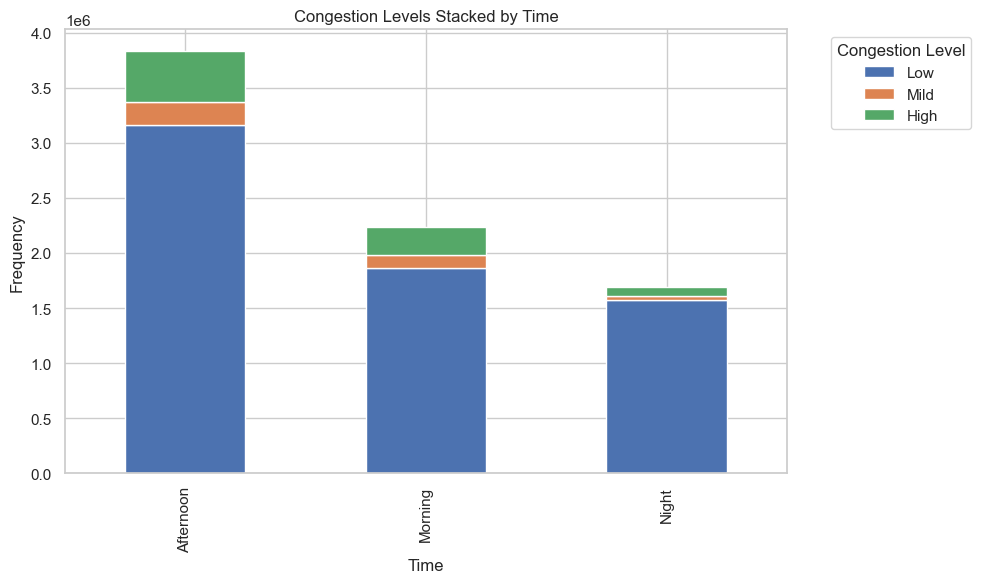

In [107]:
df = agg_trips.groupby(['congestion_type', 'PUtime_day']).size().unstack(fill_value=0)
df.T.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Congestion Levels Stacked by Time')
plt.legend(title='Congestion Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

/var/folders/tj/6r6lk3n90794wvh1l2dmsmv00000gn/T/ipykernel_2507/2740087739.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['congestion_type', 'time_day']).size().unstack(fill_value=0)


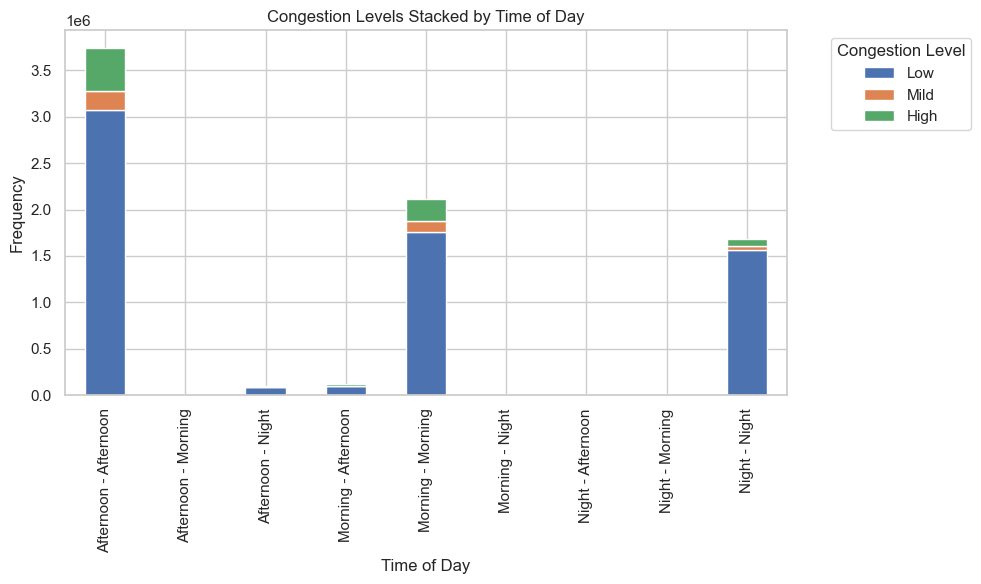

In [108]:
df=pd.DataFrame(data=agg_trips.loc[:,['congestion_type','PUtime_day','DOtime_day']])
df['time_day']=df['PUtime_day']+' - '+df['DOtime_day']
df = df.groupby(['congestion_type', 'time_day']).size().unstack(fill_value=0)
df.T.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.title('Congestion Levels Stacked by Time of Day')
plt.legend(title='Congestion Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

7.

In [109]:
df=pd.DataFrame(data=agg_trips.loc[:,['congestion_type','PUZone','DOZone']])
df['Zone']=df['PUZone']+' - '+df['DOZone']
df = df.groupby(['congestion_type', 'Zone']).size().unstack(fill_value=0)
df

/var/folders/tj/6r6lk3n90794wvh1l2dmsmv00000gn/T/ipykernel_2507/2843091002.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['congestion_type', 'Zone']).size().unstack(fill_value=0)


Zone,Allerton/Pelham Gardens - Allerton/Pelham Gardens,Allerton/Pelham Gardens - Astoria,Allerton/Pelham Gardens - Belmont,Allerton/Pelham Gardens - Bensonhurst East,Allerton/Pelham Gardens - Bronxdale,Allerton/Pelham Gardens - Bushwick South,Allerton/Pelham Gardens - Central Harlem North,Allerton/Pelham Gardens - City Island,Allerton/Pelham Gardens - Clinton East,Allerton/Pelham Gardens - Clinton Hill,...,Yorkville West - Williamsbridge/Olinville,Yorkville West - Williamsburg (North Side),Yorkville West - Williamsburg (South Side),Yorkville West - Windsor Terrace,Yorkville West - Woodhaven,Yorkville West - Woodlawn/Wakefield,Yorkville West - Woodside,Yorkville West - World Trade Center,Yorkville West - Yorkville East,Yorkville West - Yorkville West
congestion_type,,,,,,,,,,,,,,,,,,,,,
Low,2,1,3,1,3,3,6,1,1,1,...,7,107,118,11,10,14,53,171,3706,4014
Mild,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,975,961
High,8,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1385,2040


8.

In [110]:
agg_trips.groupby('DOZone')[['tip_amount']].mean().nlargest(20, 'tip_amount', keep='all')

,tip_amount
DOZone,
Eltingville/Annadale/Prince's Bay,15.63
Newark Airport,14.42
Oakwood,14.21
Great Kills,13.91
Rossville/Woodrow,12.81
JFK Airport,10.79
West Brighton,9.81
Outside of NYC,9.69
LaGuardia Airport,9.14


<Figure size 1000x1000 with 0 Axes>

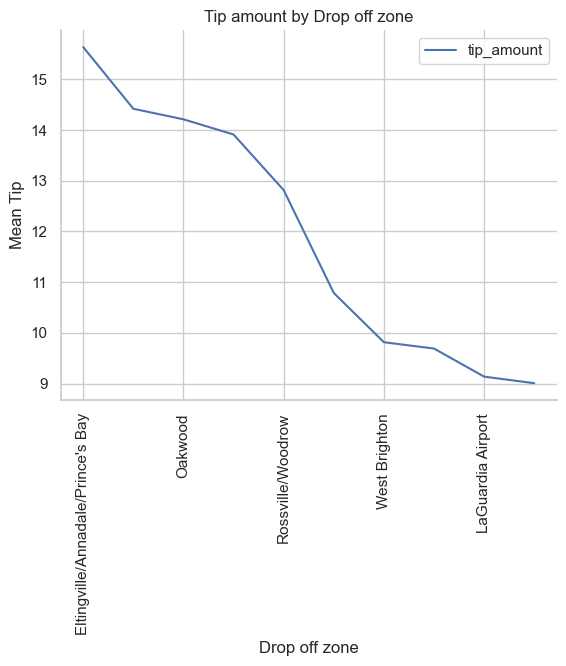

In [111]:
plt.figure(figsize=(10,10))
agg_trips.groupby('DOZone')[['tip_amount']].mean().nlargest(10, 'tip_amount', keep='all').plot.line()
plt.xlabel('Drop off zone')
plt.ylabel('Mean Tip')
plt.title('Tip amount by Drop off zone')
plt.xticks(rotation=90)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

###F-

In [112]:
copy_trips

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-07-01 00:29:59,2023-07-01 00:40:15,1.00,1.80,1.00,N,140,263,1,12.10,3.50,0.50,5.10,0.00,1.00,22.20,2.50,0.00
1,2,2023-07-01 00:03:25,2023-07-01 00:23:44,1.00,2.31,1.00,N,163,163,2,19.10,1.00,0.50,0.00,0.00,1.00,24.10,2.50,0.00
2,2,2023-07-01 00:38:29,2023-07-01 00:48:53,1.00,2.36,1.00,N,142,262,1,13.50,1.00,0.50,3.70,0.00,1.00,22.20,2.50,0.00
3,2,2023-07-01 00:14:16,2023-07-01 00:29:13,1.00,4.36,1.00,N,68,24,1,19.80,1.00,0.50,4.96,0.00,1.00,29.76,2.50,0.00
4,1,2023-07-01 00:11:15,2023-07-01 00:20:47,0.00,1.60,1.00,N,161,107,1,11.40,3.50,0.50,3.25,0.00,1.00,19.65,2.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846714,2,2023-09-30 23:04:42,2023-09-30 23:20:58,NaN,5.84,NaN,None,43,243,0,29.19,0.00,0.50,3.00,0.00,1.00,36.19,NaN,NaN
2846715,2,2023-09-30 23:08:00,2023-09-30 23:30:59,NaN,5.13,NaN,None,89,225,0,26.57,0.00,0.50,0.00,0.00,1.00,28.07,NaN,NaN
2846716,2,2023-09-30 23:28:48,2023-09-30 23:35:59,NaN,1.36,NaN,None,229,140,0,14.48,0.00,0.50,3.70,0.00,1.00,22.18,NaN,NaN
2846717,2,2023-09-30 23:31:12,2023-09-30 23:48:29,NaN,2.43,NaN,None,125,107,0,17.69,0.00,0.50,4.34,0.00,1.00,26.03,NaN,NaN


Mapeamos los números, a categorías.
Identificamos que el 0 no debería ser un tipo de "Payment_Type", decidimos incluirlo en categoría "Unknow"


In [113]:
copy_trips['payment_type'].unique()

array([1, 2, 4, 3, 0])

In [114]:
payment_type_map = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

copy_trips['payment_type'] = copy_trips['payment_type'].replace(0, np.nan)

copy_trips['payment_type'] = copy_trips['payment_type'].map(payment_type_map)

copy_trips['payment_type'].fillna('Unknown', inplace=True)

/var/folders/tj/6r6lk3n90794wvh1l2dmsmv00000gn/T/ipykernel_2507/462167837.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copy_trips['payment_type'].fillna('Unknown', inplace=True)


In [115]:
copy_trips["payment_type"].unique()

array(['Credit card', 'Cash', 'Dispute', 'No charge', 'Unknown'],
      dtype=object)

Barplot que muestra "Cantidad de Viajes por Método de Pago"

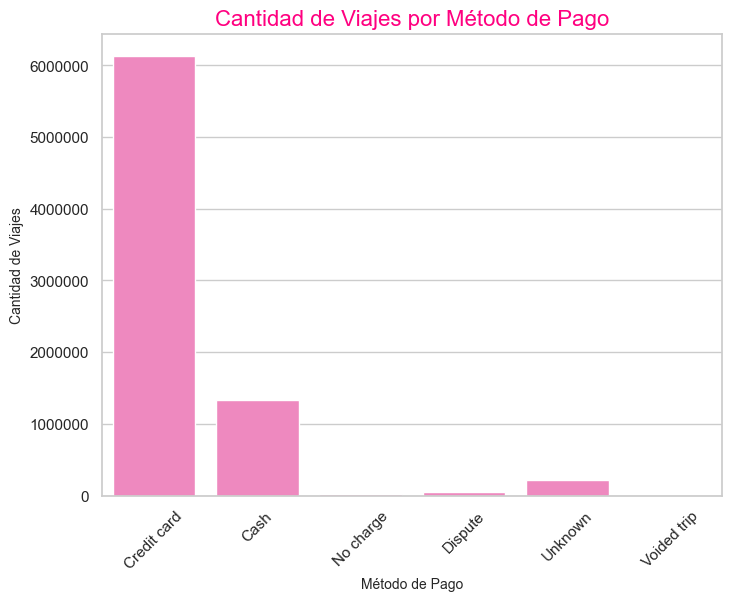

In [116]:
plt.figure(figsize=(8, 6))

sns.countplot(data=copy_trips, x='payment_type', order=['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip'], color = '#FF78C0')

plt.title('Cantidad de Viajes por Método de Pago', fontsize=16, color = '#FF0080')
plt.xlabel('Método de Pago', fontsize=10)
plt.ylabel('Cantidad de Viajes', fontsize=10)

plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='y')

plt.show()



In [117]:
print(copy_trips['trip_distance'].describe())

count           7,760,712.00
mean                    2.85
std                     3.26
min                     0.01
25%                     1.05
50%                     1.73
75%                     3.09
max                    95.60
Name: trip_distance, dtype: float64


Histograma que muestra "Distribución de distancia de los viajes"

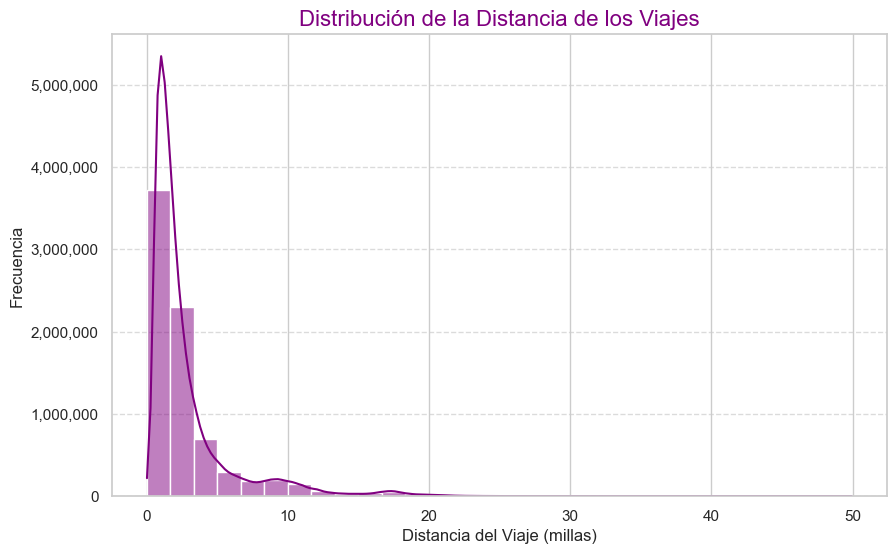

In [118]:
filtered_trips = copy_trips[copy_trips['trip_distance'] < 50]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_trips['trip_distance'], bins=30, kde=True, color='purple')

plt.title('Distribución de la Distancia de los Viajes', fontsize=16, color='purple')
plt.xlabel('Distancia del Viaje (millas)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Heatmap que muestra la densidad de viajes según el día de la semana y la hora del día.

In [119]:
copy_trips['pickup_hour'] = copy_trips['tpep_pickup_datetime'].dt.hour
copy_trips['day_of_week'] = copy_trips['tpep_pickup_datetime'].dt.day_name()

days_translation = {
    'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles',
    'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'
}
copy_trips['day_of_week'] = copy_trips['day_of_week'].map(days_translation)

heatmap_data = copy_trips.groupby(['day_of_week', 'pickup_hour']).size().reset_index(name='counts')

order_days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

fig = px.density_heatmap(heatmap_data, x='pickup_hour', y='day_of_week', z='counts',
                        color_continuous_scale='YlOrBr',
                        labels={'pickup_hour': 'Hora del Día', 'day_of_week': 'Día de la Semana'},
                        title='Heatmap de Densidad de Viajes por Hora del Día y Día de la Semana',
                        category_orders={'day_of_week': order_days})

fig.update_xaxes(tickvals=list(range(24)), ticktext=[f'{i}:00' for i in range(24)])

fig.update_layout(title={'text': 'Heatmap de Densidad de Viajes por Hora del Día y Día de la Semana',
                         'x': 0.5,
                         'xanchor': 'center',
                         'font': {'size': 24, 'color': 'orange'}})
fig.update_layout(coloraxis_colorbar_title='Nro de Viajes')
fig.show()